<a href="https://colab.research.google.com/github/CIS-522/course-content/blob/week1fixes/tutorials/W1_AlphaZero/W1_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS-522 Week 1 Part 1
# Introduction and AlphaZero

__Instructor:__ Konrad Kording

__Content creators:__ Ari Benjamin, Richard Lange, Byron Galbraith


---
# Course introduction


Video available at https://youtube.com/watch?v=4DuhPv8EsWk


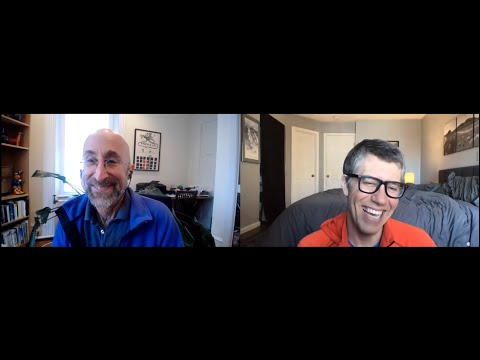

In [1]:
#@title Video: Lyle and Konrad
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="4DuhPv8EsWk", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

import time
try: t0;
except NameError: t0=time.time()

video

Video available at https://youtube.com/watch?v=lei7Sh8a21I


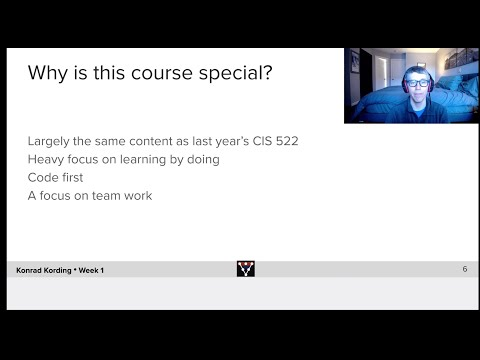

In [2]:
#@title Video: Welcome to the Deep Learning Academy
video = YouTubeVideo(id="lei7Sh8a21I", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

After watching the video, chat with your pod for a bit (10 minutes) and introduce yourselves.

## Know your tool: Google Colab.

Video available at https://youtube.com/watch?v=5FFuYAk5p50


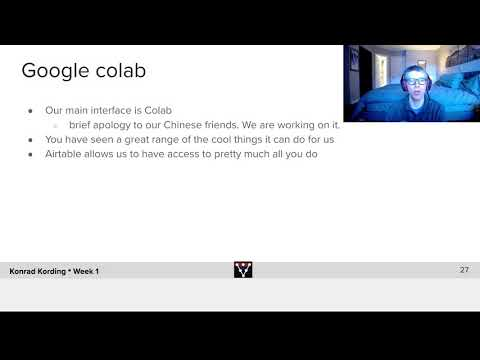

In [3]:
#@title Video: Intro to Google Colab
video = YouTubeVideo(id="5FFuYAk5p50", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

This environment is a Colab. It's a Jupyter notebook hosted on the Google Cloud. We will do everything here: embed videos, embed questionnaires, and run our code.

You'll soon be experts at this. One thing to remember is **always run all cells!**. We need you to press `Shift+Enter` or press the play button to show the videos and save your responses.

In [4]:
#@markdown What is your Pennkey and pod? (text, not numbers, e.g. bfranklin)
my_pennkey = 'value' #@param {type:"string"}
my_pod = 'sublime-newt' #@param ['Select', 'euclidean-wombat', 'sublime-newt', 'buoyant-unicorn', 'lackadaisical-manatee','indelible-stingray','superfluous-lyrebird','discreet-reindeer','quizzical-goldfish','astute-jellyfish','ubiquitous-cheetah','nonchalant-crocodile','fashionable-lemur','spiffy-eagle','electric-emu','quotidian-lion']


#### Ensure you're running a GPU notebook.

From "Runtime" in the drop-down menu above, click "Change runtime type". Ensure that "Hardware Accelerator" says "GPU".

#### Ensure you can save!

From "File", click "Save a copy in Drive"

#### Save your answers

After you type into a form, like you just did, make sure you ran the cell to save your answer. Your answer will be saved in a variable:

In [5]:
print(my_pennkey)

value


## Who we are

Video available at https://youtube.com/watch?v=t2s_9X5dSls


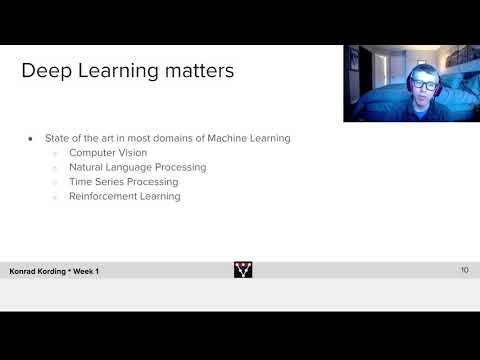

In [6]:
#@title Video: Introduction to Pods
param_list = ['my_pennkey', 'my_pod']
for param in param_list:
    if param not in locals():
        raise NameError("Please make sure to run the cell "
                        "after submitting your answer for <{}>!".format(param))

video = YouTubeVideo(id="t2s_9X5dSls", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

In [7]:
#@markdown (RUN ME) Show student locations. Drag and zoom!
lat = [39.95, 40.35, 39.95, 32.7, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 41.03, 39.95, 40.41, 39.95, 39.95, 39.95, 39.95, 12.98, 39.95, 40.32, 39.95, 39.95, 39.95, 39.95, 39.95, 19.08, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 49.28, 37.34, 39.95, 39.95, 32.72, 45.63, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 32.06, 39.95, 39.95, 44.02, 39.95, 40.15, 28.0, 39.95, 39.95, 38.92, 47.48, 39.75, 22.56, 39.95, 22.28, 39.95, 39.95, 39.95, 39.95, 37.34, 39.95, 39.95, 49.26, 48.14, 39.95, 37.0, 37.57, 42.38, 39.95, 39.95, 39.95, 28.71, 39.95, 39.8, 39.95, 39.95, 39.95, 39.95, 37.32, 39.95, 39.95, 39.95, 39.95, 35.0, 39.95, 38.97, 43.59, 39.95, 39.95, 32.78, 30.33, 30.6, 39.91, 39.95, 40.54, 39.95, 39.95, 49.26, 39.95, 38.92, 39.95, 39.96, 39.95, 38.93, 39.95, 39.95, 39.95, 42.36, 39.95, 39.95, 39.95, 39.95, 41.12, 39.95, 34.34, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.1, 39.95, 39.95, 39.95, 43.07, 30.25, 39.95, 39.95]
lon = [-75.16, -74.66, -75.16, -97.11, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -74.1, -75.16, -74.57, -75.16, -75.16, -75.16, -75.16, 77.59, -75.16, -74.62, -75.16, -75.16, -75.16, -75.16, -75.16, 72.88, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -122.79, -121.89, -75.16, -75.16, -117.16, -122.67, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, 118.79, -75.16, -75.16, -92.46, -75.16, -74.71, 120.7, -75.16, -75.16, 121.63, 19.15, -75.55, 114.05, -75.16, 114.16, -75.16, -75.16, -75.16, -75.16, -121.89, -75.16, -75.16, -123.11, 11.58, -75.16, 112.0, 126.98, -71.11, -75.16, -75.16, -75.16, 77.44, -75.16, -75.46, -75.16, -75.16, -75.16, -75.16, -122.03, -75.16, -75.16, -75.16, -75.16, 105.0, -75.16, -76.86, -79.64, -75.16, -75.16, -96.8, -81.66, 114.3, 116.39, -75.16, -74.39, -75.16, -75.16, -123.11, -75.16, 121.63, -75.16, -75.61, -75.16, -74.92, -75.16, -75.16, -75.16, -71.06, -75.16, -75.16, -75.16, -75.16, -73.41, -75.16, 108.94, -75.16, -75.16, -75.16, -75.16, -75.16, -75.16, -76.85, -75.16, -75.16, -75.16, -89.38, 120.21, -75.16, -75.16]

import plotly as py
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locationmode = 'country names',
        lon = np.array(lon) + np.random.randn(len(lon))*1e-2,
        lat = np.array(lat) + np.random.randn(len(lon))*1e-2,
        marker = {"color" :'red'}
    )
)

fig.update_layout(
    title_text = '',
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'world',
        projection_type = 'natural earth',lakecolor = 'rgb(199, 226, 255)',
        showland = True, showocean = True,showlakes = True,
        landcolor = 'rgb(245, 255, 230)',
        countrycolor = 'rgb(204, 204, 204)',
        oceancolor='rgb(199, 226, 255)'
    ),
)

py.offline.iplot(fig)

## Our curriculum


Video available at https://youtube.com/watch?v=7Cs835C88x0


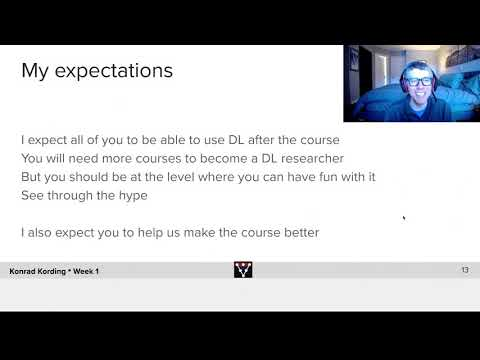

In [8]:
#@title Video: Course Expectations
if 'your_location' not in locals():
    your_location = "None"
video = YouTubeVideo(id="7Cs835C88x0", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

Discuss with your pod what you hope to get out of this course, and your previous experience with deep learning.

## Course logistics


Video available at https://youtube.com/watch?v=yf_PZcPumOo


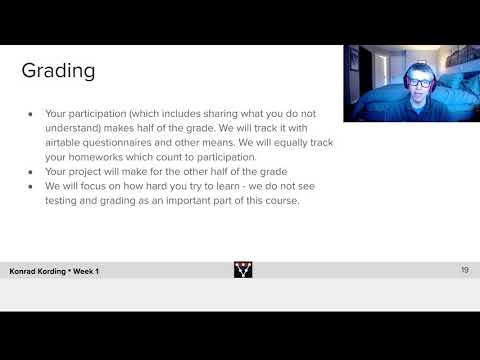

In [9]:
#@title Video: Course Logistics

video = YouTubeVideo(id="yf_PZcPumOo", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

In [10]:
#@markdown How important is learning theory vs. implementation skills for you?
theory_or_implementation = 5.7 #@param {type:"slider", min:0, max:10, step:0.1}

Let 0 be all theory and no implementation, and 10 be all implementation and no theory.

Again, make sure to run the cell to save your answer.

## Interacting with this course

Video available at https://youtube.com/watch?v=iJ7mwRRgGSk


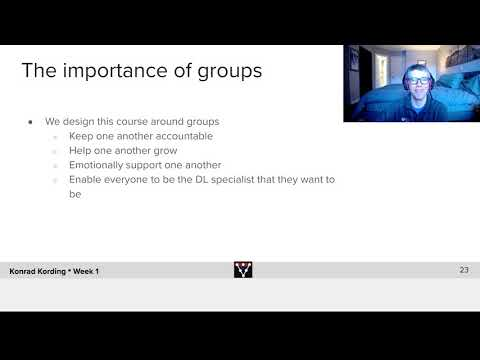

In [11]:
#@title Video: Standards for Conduct

param_list = ['theory_or_implementation']
for param in param_list:
    if param not in locals():
        raise NameError("Please make sure to run the cell "
                        "after submitting your answer for <{}>!".format(param))

video = YouTubeVideo(id="iJ7mwRRgGSk", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

After you watch the video, please read through the [code of conduct](https://docs.google.com/document/d/1eHKIkaNbAlbx_92tLQelXnicKXEcvFzlyzzeWjEtifM/edit?usp=sharing).

---
# BREAK. 
Take 5 minutes and get some tea.

---
# Setup

In [12]:
# Imports
import torch
import torch.nn.functional as F
from torch import nn
import numpy as np
import os
from numba import cuda
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from typing import List
from copy import deepcopy

from tqdm.notebook import tqdm
import IPython
from IPython.display import IFrame
from google.colab import output


In [13]:
# @title Figure Settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

fig_w, fig_h = (8, 6)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/"
              "course-content/master/nma.mplstyle")

In [14]:
# @title Helper functions

def outcome2color(outcome, alpha=1):
    """Return RGB color for given outcome (-1, 0, +1)
    """
    if outcome == +1:
        return (40/255., 229./255., 40/255., alpha) # Win as green
    elif outcome == -1:
        return (229./255., 40/255., 0, alpha) # Loss as red
    else:
        return (0, 76/255., 220/255., alpha) # Draw as blue

def win_statistics(agent1, agent2, games_per_side=100, bar_plot=True):
    """Play agent1 vs agent2 many times to get some statistics. At the end, show
    statistics with a bar plot and return wins/draws/losses for agent1. Runs
    'games_per_side' matches with agent1 as player 1 and another 'games_per_side'
    matches with agent1 as player 2.

    The returned 'win_info' table is size 2x3. Row 0 counts agent1 as player 1.
    Row 1 counts agent1 as player 2. Col 0 is wins for agent1, col 1 is draws,
    and col 2 is losses
    """
    win_info = np.zeros((1, 3))
    # Play agent1 as player 1
    outcome, _ = ai_vs_ai(agent1, agent2, n_games=games_per_side, 
                          n=6)
    for g in range(games_per_side):
        col_idx = 1-outcome[g,0] # Map agent1 outcome (-1,0,1) to column index (2,1,0)
        win_info[0, col_idx] += 1
    # (Maybe) plot
    if bar_plot:
        # Approximate standard error in each probability estimate (it would be
        # more correct to do confidence intervals on the binomial distribution
        # for each of win/draw/loss, but this is fine for a large # of games)
        win_prob = win_info / games_per_side
        win_se = np.sqrt(win_prob*(1-win_prob)/games_per_side)
        plt.figure(figsize=(4,6))
        plt.bar([0], win_prob[:,0], yerr=win_se[:,0], color=outcome2color(1, .8), label="wins")
        plt.bar([0], win_prob[:,1], yerr=win_se[:,1], bottom=win_prob[:,0], color=outcome2color(0, 0.8))
        plt.bar([0], win_prob[:,2], yerr=win_se[:,2], bottom=win_prob[:,:2].sum(axis=1), color=outcome2color(-1, 0.8))
        plt.xticks([])
        plt.yticks(np.linspace(0,1,11))
        plt.ylabel("Fraction games won")
        plt.title(f"{agent1.name} vs {agent2.name}")
        plt.legend([f"{agent1.name} wins", "draws", f"{agent1.name} loses"])
        plt.grid()
        plt.show()
    return win_info


def actions_as_tensor(actions_list):
  """Takes a list of actions and returns the same as a Tensor.
  Handles the case when some games have more available actions.
  Inputs:
     actions_list is a list of lists of tuples. One list per game.

  """
  num_actions_each_game = torch.as_tensor(
                           [len(acts) for acts in actions_list])
  max_actions = num_actions_each_game.max()
  n_games = len(actions_list)
  values = float('-inf')*torch.ones(n_games, max_actions)
  # Create a tensor of [n_games, max_actions, 2] that contains
  # all available actions for all games, padded with -1s (pass move)
  # where games have fewer than max_actions possible actions.
  actions_tensor = -torch.ones(n_games, max_actions, 2,
                                dtype=torch.int32)
  for g in range(game.n_games):
      if num_actions_each_game[g] == 0:
          continue
      actions_tensor[g, :num_actions_each_game[g], :] =\
          torch.as_tensor(actions_list[g], dtype=torch.int32)
  return actions_tensor
# 

---
# Section 1: implementing AlphaZero

Video available at https://youtube.com/watch?v=iWNkBeK8WZ0


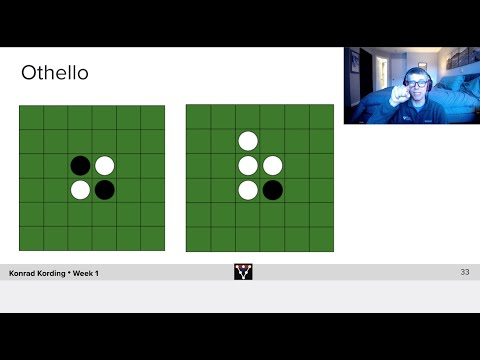

In [15]:
#@title Video: Lesson 1 Intro + Othello
video = YouTubeVideo(id="iWNkBeK8WZ0", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

try: t1;
except NameError: t1=time.time()

video

### Objectives for today
 - Understand Othello as we build up to solving it with AlphaZero
 - Understand how a NN can be used in gameplay
 - Build examples and objectives
 - Train our first neural network



In [16]:
#@title Section 1.1: Create OthelloGame and InteractiveOthelloGame

# Environment config so that numba knows where to find CUDA libraries
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/local/cuda-10.0/nvvm/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/local/cuda-10.0/nvvm/lib64/libnvvm.so"

# 1st dimension is row, 2nd is col. Top-left corner of board is (0,0). 8 vector
# directions out from each point are:
RAYS = np.array([[0, 1],   # east
                 [0, -1],  # west
                 [1, 0],   # south
                 [-1, 0],  # north
                 [1, 1],   # southeast
                 [1, -1],  # southwest
                 [-1, 1],  # northeast
                 [-1, -1]],# northwest
                dtype=np.int32)

# ======================================
# === BEGIN CUDA-ACCELERATED HELPERS ===
# ======================================

def torch2cuda(arr:torch.Tensor) -> cuda.cudadrv.devicearray.DeviceNDArray:
    return cuda.as_cuda_array(arr)

def cuda2torch(arr:cuda.cudadrv.devicearray.DeviceNDArray) -> torch.Tensor:
    return torch.as_tensor(arr, device='cuda')

@cuda.jit(device=True)
def cuda_cast_rays(board, y0, x0, ray, player):
    """Helper CUDA kernel that searches out from row, column coordinate (y0,x0)
    in the direction specified by "ray". Returns True iff there is an unbroken
    line of opponent stones along the ray starting at (y0,x0), ending with a
    stone belonging to "player".
    
    The device=True decorator means that this may only be called from other CUDA
    kernels (see below).
    """
    n = board.shape[1]
    opponent = 3 - player
    y, x = y0+ray[0], x0+ray[1]

    # The ray must begin with an opponent stone 1 space away
    if x < 0 or y < 0 or x >= n or y >= n or board[y, x] != opponent:
        return False
    
    # Keep looking until edge of the board or we find an open space or we find
    # a player-owned stone
    y, x = y+ray[0], x+ray[1]
    while x >= 0 and y >= 0 and x < n and y < n:
        # Ray terminates on an open space. Not a valid move.
        if board[y, x] == 0:
            return False
        
        # Ray terminates on player. This is valid!
        if board[y, x] == player:    
            return True
        
        y, x = y+ray[0], x+ray[1]
        
    # Reached end of the board. Not a valid move.
    return False

@cuda.jit
def cuda_get_valid_actions(boards, player, valid_actions):
    """Helper CUDA kernel that calls cuda_cast_rays to find all legal moves
    in parallel across many boards and positions. Results are written into the
    array "valid_actions" which must be the same shape as "boards".

    Decorating with @cuda.jit means we can call it from python by passing cuda
    device array objects for "board" and "valid_actions".

    CUDA is structured by 'blocks' and 'threads'. Each block contains multiple
    threads. It is the caller's job to say how many of each and their effective
    size. For instance, cuda_get_valid_actions[4, (8,8)](...) is the syntax for
    "4 blocks, each of which has 8 'x' and 8 'y' threads".

    We use a separate block per board, and each thread evaluates a single board
    coordinate.
    """
    # From numba documentation: const.array_like copies the given array into
    # constant GPU memory *at compile time*. This means the copy only happens
    # the first time this function is called.
    rays = cuda.const.array_like(RAYS)

    # We access boards through the 1d block index (boardIdx.x) and positions
    # within the board through the thread index x and y.
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    bx = cuda.blockIdx.x
    
    # If a space is occupied, it's an illegal move and we're done. Store a zero
    # at coordinate (ty, tx) on board bx.
    if boards[bx, ty, tx] != 0:
        valid_actions[bx, ty, tx] = 0
        return

    # Try out all 8 ray directions. If any one is a hit, set return value to 1
    # and break.
    for i in range(8):
        hit = cuda_cast_rays(boards[bx], ty, tx, rays[i], player)
        if hit:
            valid_actions[bx, ty, tx] = 1
            return
    
    # We tried all of the rays and none were legal capturing moves.
    valid_actions[bx, ty, tx] = 0

@cuda.jit
def cuda_step(boards, actions, player):
    """Helper CUDA kernel for playing actions across multiple boards in parallel.

    Boards must be [num_games, n, n], actions must be [num_games, 2] and player
    must be 1 or 2. Actions are (row, col) indices of the player's stone.

    WARNING: no legality checks are performed here! It is the caller's
    responsibility to ensure that all moves are legal.

    Boards are indexed by block x and the 8 ray directions by thread x

    If either of actions[b,:] is -1, treated as pass.
    """
    # As in cuda_get_valid_actions, this copy happens once at compile time
    rays = cuda.const.array_like(RAYS)

    # Grab thread and block index from cuda context
    tx = cuda.threadIdx.x
    bx = cuda.blockIdx.x  

    # Unpack the row, col coordinate of the action
    act_y, act_x = actions[bx]

    # If -1, the player passed and there is nothing to do.
    if act_x == -1 or act_y == -1:
        return

    # Search a different ray direction on each of 8 threads. ASSUMES the move
    # is legal.
    is_hit = cuda_cast_rays(boards[bx], act_y, act_x, rays[tx], player)
    if is_hit:
        dy, dx = rays[tx]
        opponent = 3 - player
        y, x = act_y+dy, act_x+dx
        while boards[bx, y, x] == opponent:
            # Modify the board, flipping opponent to player
            boards[bx, y, x] = player
            y, x = y+dy, x+dx
    
    # Only need to do this once, so just let thread #0 handle it: update
    # the board at location of the action
    if tx == 0:
        boards[bx, act_y, act_x] = player

# ====================================
# === BEGIN OTHELLOGAME DEFINITION ===
# ====================================

class OthelloGame(object):
    PLAYER1 = 1
    PLAYER2 = 2
    ACTIVE = 0
    OVER = 1
    PASS = (-1, -1)
    # Unicode characters for dark and light circles if printing to console.
    # By convention, player 1 is dark and 2 is light.
    GAME_SYMBOLS = ['_', '\u25cf', '\u25cb']

    def __init__(self, n_games=1, n=8):
        """Create a new batch of n_games othello games each with board size [n,n]

        The game states are managed on the GPU with the help of CUDA kernels.

        We expect all n games to update in lockstep, so that there is only one
        'current_player' shared by all of them.
        """
        self.n_games = n_games
        self.n = n
        self.boards = torch.zeros((n_games, n, n), dtype=torch.float32, device='cuda')
        # Initial positions: 4 stones in the center alternating color
        self.boards[:, [self.n//2, self.n//2-1], [self.n//2, self.n//2-1]] = OthelloGame.PLAYER2
        self.boards[:, [self.n//2, self.n//2-1], [self.n//2-1, self.n//2]] = OthelloGame.PLAYER1
        # Always start with player 1 (dark stones by convention)
        self.current_player = OthelloGame.PLAYER1
        # All games are initially active
        self.game_status = OthelloGame.ACTIVE*torch.ones(n_games, dtype=torch.int32, device='cuda')
        # If both players pass the game is over. Keep track of whether the last
        # player passed.
        self.last_player_pass = torch.zeros(n_games, dtype=torch.int32, device='cuda')

        # _valid_moves is a container for storing which moves are valid. It is
        # zero everywhere except where it is legal to play, which is 1.
        self._valid_moves = torch.zeros_like(self.boards)

        # Create a CUDA device array copy of each GPU tensor. These share GPU
        # memory with torch tensors so any changes made in CUDA kernels are seen
        # by torch.
        self._cuda_boards = torch2cuda(self.boards)
        self._cuda_valid = torch2cuda(self._valid_moves)

        # Populate valid moves using CUDA-ized algorithm
        cuda_get_valid_actions[self.n_games, (self.n, self.n)](self._cuda_boards, self.current_player, self._cuda_valid)

        # Initialize 'zobrist hash' table for get_uid() function
        self._new_zobrist_table()

    def step(self, actions:torch.Tensor):
        """Place a stone for the current player at location action=(row,col)
        separately per board. Expected size of 'actions' is [n_games, 2].

        Action coordinates of -1 treated as passing.

        Actions are ignored for all games that are not in the ACTIVE state.

        Note: no legality checking here! It is the caller's responsibility to
        ensure 'action' is legal, e.g. by checking that action is in
        game.get_available_actions().
        """
        # Ensure actions is a torch tensor and on the GPU. Ensure its shape is
        # [n_games, 2] even if the input was, say, just a (row,col) tuple.
        actions = torch.as_tensor(actions, device='cuda').view(-1, 2)

        # Ensure actions are "pass" for games that have completed. This tells
        # the cuda_step kernel to ignore these games.
        actions[self.game_status == OthelloGame.OVER, :] = -1

        # Update board state with call to CUDA kernel cuda_step.
        cuda_step[self.n_games, RAYS.shape[0]](self._cuda_boards, torch2cuda(actions), self.current_player)

        # Advance to the next player (2->1 and 1->2).
        self.current_player = 3-self.current_player

        # Count passes - any games with 2 passes in a row is flagged as being over.
        is_pass = torch.any(actions == -1, dim=1)
        self.last_player_pass[~is_pass] = 0
        self.last_player_pass[is_pass] += 1

        # Flag games that have finished
        is_game_over = self.last_player_pass >= 2
        self.game_status[is_game_over] = OthelloGame.OVER

        # Look for valid moves in the updated boards for the new player
        cuda_get_valid_actions[self.n_games, (self.n, self.n)](self._cuda_boards, self.current_player, self._cuda_valid)

    def copy_state(self, idx=None):
        # Grab the minimal amount of state info to be able to return the board
        # to its current configuration later with a call to paste_state.
        # NOTE: this copy is single-use only; once it is pasted, it will be
        # modified in-place!
        return {"boards": self.boards.clone(),
                "game_status": self.game_status.clone(),
                "last_player_pass": self.last_player_pass.clone(),
                "current_player": self.current_player}


    def paste_state(self, state):
        self.__dict__.update(state)
        self._cuda_boards = torch2cuda(self.boards)
        self._cuda_valid = torch2cuda(self._valid_moves)
        cuda_get_valid_actions[self.n_games, (self.n, self.n)](self._cuda_boards, self.current_player, self._cuda_valid)

    def render(self, mode='human'):
        boards = self.boards.cpu()
        acts = self.get_available_actions()
        for g in range(self.n_games):
            if mode == 'text':
                print("="*(self.n-1) + (f"{OthelloGame.GAME_SYMBOLS[self.current_player]}")*2 + "="*(self.n-1))
                for row in boards[g]:
                    print(" ".join(OthelloGame.GAME_SYMBOLS[v] for v in row))
                print("="*(self.n*2))
            else:
                # Plot with matplotlib patches. Player 1 is dark and 2 is light.
                fig, ax = plt.subplots(figsize=(6,6))
                ax.set_aspect('equal')
                rect = patches.Rectangle((0,0),self.n,self.n,linewidth=1,edgecolor='k',facecolor='g')
                ax.add_patch(rect)
                ax.set_xlim(0,self.n)
                ax.set_ylim(0,self.n)
                ax.set_yticklabels([])
                ax.set_xticklabels([])
                ax.tick_params(length=0)
                ax.grid(which='major', zorder=0, c='k')
                for i in range(self.n):
                    for j in range(self.n):
                        if boards[g,i,j]>0:
                            # Draw stones
                            c = (0,0,0,1) if boards[g,i,j]==OthelloGame.PLAYER1 else (1,1,1,1)
                            circ = patches.Circle((j+.525,self.n-1-i+.5), .4, 
                                                facecolor=c, linewidth=1,edgecolor='k')
                            ax.add_patch(circ)
                        elif (i,j) in acts[g]:
                            # Draw transluscent stones on legal move positions
                            c = (0,0,0,0.25) if self.current_player==OthelloGame.PLAYER1 else (1,1,1,0.25)
                            circ = patches.Circle((j+.525,self.n-1-i+.5), .4, facecolor=c, linewidth=0)
                            ax.add_patch(circ)
                plt.show()

    def get_available_actions(self):
        """Get a list of all legal actions for the current player (passing not included).
        
        Note: assumes self._valid_moves is up to date!
        """
        acts = [None]*self.n_games
        for g in range(self.n_games):
            i, j = torch.where(self._valid_moves[g] == 1)
            acts[g] = list(zip(i.cpu().numpy(), j.cpu().numpy()))
        return acts

    def are_games_over(self):
        return torch.all(self.game_status == OthelloGame.OVER).item()

    def score_games(self):
        """Compute [n_games, 2] tuple containing "scores" for player 1 and 2 in
        each column. Assumes game is over.

        scores[:,0] is +1 if player 1 won, 0 for draw, or -1 for loss
        scores[:,1] is the same from player 2's perspective
        """
        flat_boards = self.boards.view(self.n_games, -1)
        n_dark = torch.sum(flat_boards == OthelloGame.PLAYER1, dim=1)
        n_lite = torch.sum(flat_boards == OthelloGame.PLAYER2, dim=1)
        scores = torch.zeros_like(n_dark)
        scores[n_dark > n_lite] = 1
        scores[n_dark < n_lite] = -1
        return torch.stack([scores,-scores], dim=1)
    
    def get_uid(self, out=None):
        """Return highly-probably-unique identifier for each game. Output is a
        tensor of [n_games] int64 values.

        Algorithm is Zobrist hashing.
        """
        flat_boards = self.boards.reshape(self.n_games, -1)
        # Board values are 0,1,2 for each player. Use these as an index into
        # the self._hash_bits table: each state [0,1,2] at each position in the
        # [n,n] board has a unique random bit string. The Zobrist algorithm is
        # simply an XOR of all of these values.
        bit_strings = self._hash_bits[torch.arange(self.n**2), flat_boards.long()]
        # Manually xor everything together (there is no pytorch operation for
        # xor along a dimension, unfortunately)
        if out is None:
            out = torch.zeros(self.n_games, dtype=torch.int64, device='cuda')
        for i in range(self.n**2):
            torch.bitwise_xor(out, bit_strings[:,i], out=out)
        return out

    def _new_zobrist_table(self):
        self._hash_bits = torch.randint(2**63-1, size=(self.n*self.n, 3), dtype=torch.int64, device='cuda')
        # Sanity check that no 2 random strings were identical
        assert len(self._hash_bits.flatten().unique()) == self.n*self.n*3

################################
#### INTERACTIVE GAME BOARD ####
################################

def temporary_info(message, clear=False):
    """Output overwritable message to the console. If clear=True, overwrite all old messages
    """
    if clear:
        output.clear(output_tags="temporary-info")
    with output.use_tags("temporary-info"):
        print(message)

class InteractiveOthelloGame(object):
    def __init__(self, game=None, player1="human", player2="human", n=8):
        if game is None:
            self.game = OthelloGame(n_games=1, n=n)
        else:
            self.game = game
            assert game.n_games == 1, "Can't handle >1 games interactively!"
        self.players = [player1, player2]

    def next_turn(self):
        self.available_acts = self.game.get_available_actions()[0]
        if self.game.game_status == OthelloGame.ACTIVE:
            the_player = self.players[self.game.current_player-1]
            temporary_info(f"Begin Player {self.game.current_player}'s turn", clear=True)
            if the_player == "human":
                if len(self.available_acts) > 0:
                    temporary_info("Input move by clicking the board")
                else:
                    temporary_info("No legal moves! Click anywhere on the board to pass.")
                self.redraw()
                self._reregister_click_callback()
            else:
                temporary_info("Waiting for AI to complete...")
                ai_action = the_player.select_move(self.game)
                self.game.step(ai_action)
                self.next_turn()
        else:
            self.redraw()
            temporary_info("GAME OVER!", clear=True)
            values = self.game.score_games()[0]
            if values[0] == 0:
                print(f"Game ended in a draw")
            else:
                winner_id = 1+np.argmax(values)
                try:
                    name = self.players[winner_id-1].name
                except AttributeError:
                    name = f"Player {winner_id}"
                print(f"{name} is the winner!")

    def handle_user_click(self, x_pix, y_pix, plot_width, plot_height):
        if len(self.available_acts) == 0:
            # If there is not available action all you can do is pass
            self.game.step(OthelloGame.PASS)
            self.next_turn()
        else:
            cell_width = plot_width / self.game.boards.shape[2]
            cell_height = plot_height / self.game.boards.shape[1]
            cell_x, cell_y = int(x_pix / cell_width), int(y_pix / cell_height)
            action = (cell_y, cell_x)
            if action in self.available_acts:
                self.game.step(action)
                self.next_turn()
            else:
                temporary_info(f"Available actions are {self.available_acts} but you clicked {action}")

    def _reregister_click_callback(self):
        # Inject javascript which will detect a click and invoke a function called 'pass_to_python_handler'
        display(IPython.display.Javascript("""
        var plot_element = document.querySelector(".output_image").firstElementChild;
        plot_element.onclick = function(event){
            google.colab.kernel.invokeFunction("pass_to_python_handler", [event.offsetX, event.offsetY, plot_element.width, plot_element.height], {});
        };
        """))

        # Tell colab that when 'pass_to_python_handler' is called in JS, it should
        # call self.handle_user_click in python
        output.register_callback("pass_to_python_handler", self.handle_user_click)

    def redraw(self):
        # Clear previous output
        output.clear(output_tags='othello-interactive')
        # Draw a fresh plot and store the figsize in pixels
        with output.use_tags('othello-interactive'):
            self.game.render()

A `game` is a class instance of `OthelloGame`. This environment is easy to use and handles all the game mechanics internally.

For speed reasons later on, a single `OthelloGame` instance can be used to manage an entire collection of games being played at once with the `n_games` argument, and expensive board-management is done on the GPU. For now, don't worry about any of these gory implementation details. We'll look at playing one game at a time.

Let's look at the initial board layout: Player 1 stones are black, Player 2 stones are white, and the transparent stones indicate legal moves for the current player.

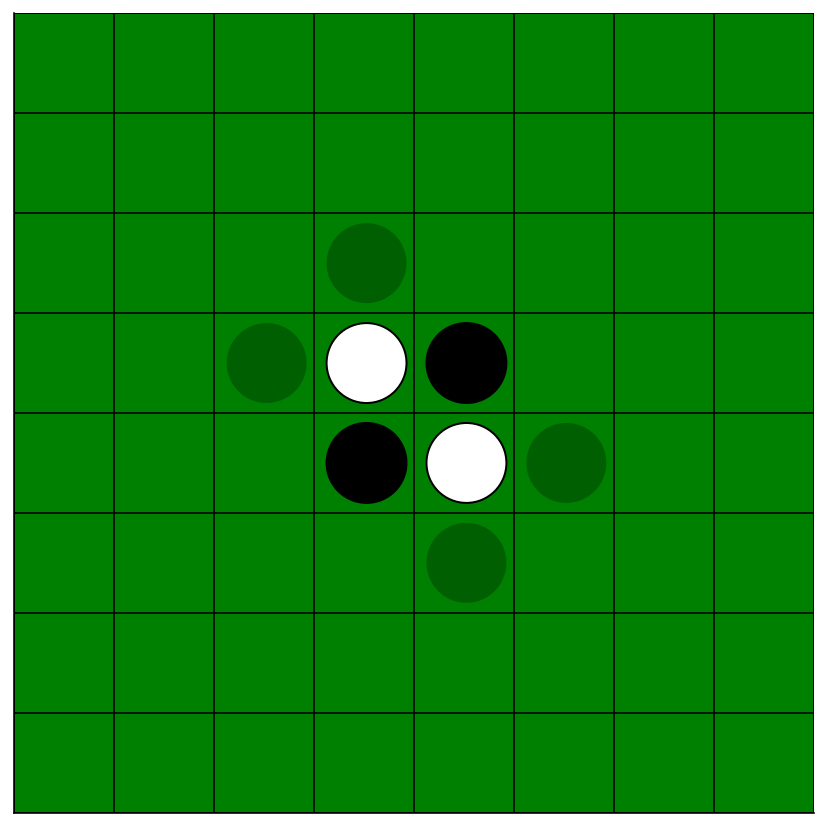

In [17]:
game = OthelloGame()
game.render()

`.get_available_actions()` will tell you which board positions are available for play from the perspective of the current player (`board.current_player`).  
**Note**: `get_available_actions()` returns a list of lists of (row, col) tuples. One list per game being played in parallel. Here, we get the 0th list, which corresponds to the 0th gameboard. Later we will play many games in parallel.

In [18]:
# the 0th list, which corresponds to the 0th gameboard.
actions = game.get_available_actions()[0]
print("Available actions: ", actions)
print("Current player: ", game.current_player)

Available actions:  [(2, 3), (3, 2), (4, 5), (5, 4)]
Current player:  1


`.step(action)` will play a move, flip the correct pieces, and switch the current player.

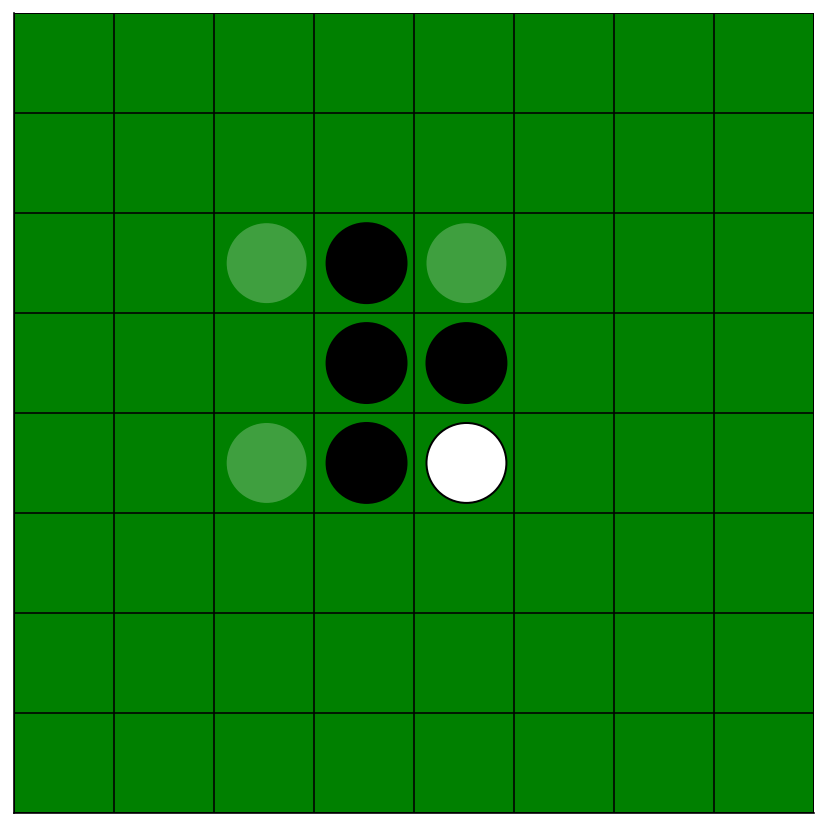

Available actions:  [(2, 2), (2, 4), (4, 2)]
Current player:  2


In [19]:
game = OthelloGame()
game.step(actions[0])
game.render()
print("Available actions: ", game.get_available_actions()[0])
print("Current player: ", game.current_player)

The game ends when both players are forced to pass in a row. Passing is only considered legal if a player has no other moves available.

`game.step(action)` doesn't enforce that moves are legal - use this power wisely!

In [20]:
print(f"PASS by playing {OthelloGame.PASS}")
game = OthelloGame()
print(game.are_games_over())
game.step(OthelloGame.PASS) # Player 1 pass
print(game.are_games_over())
game.step(OthelloGame.PASS) # Player 2 pass
print(game.are_games_over())

PASS by playing (-1, -1)
False
False
True


## Section 1.2: Playing multiple games at once



Video available at https://youtube.com/watch?v=zLEQ0xQDK8o


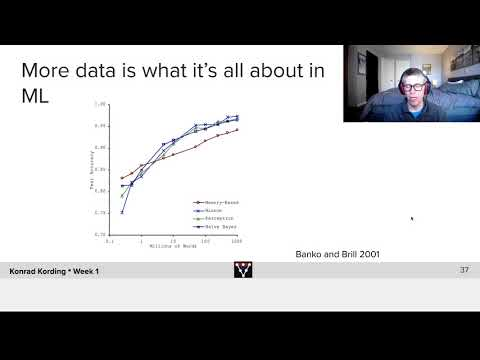

In [21]:
#@title Video: Using More Data
video = YouTubeVideo(id="zLEQ0xQDK8o", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

Deep learning almost universally works with *batches* of examples, rather than one example at a time. The biggest reason is that one example is not representative of the ensemble of data; we want to learn general aspects, not memorize that example. The other reason is that GPUs are phenomenal at parallel evaluation. We're going to start thinking like this from day 1.

Instead of 1 game at a time, we build a simulator that plays `n` games at a time. We can initialize two games with `OthelloGame(n_games=2)`:

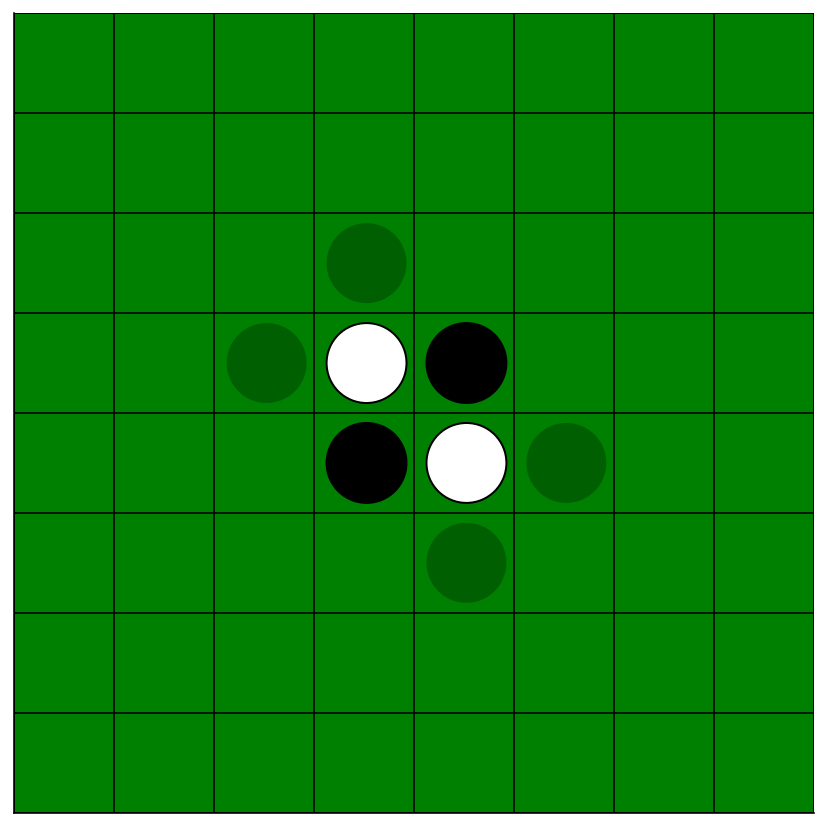

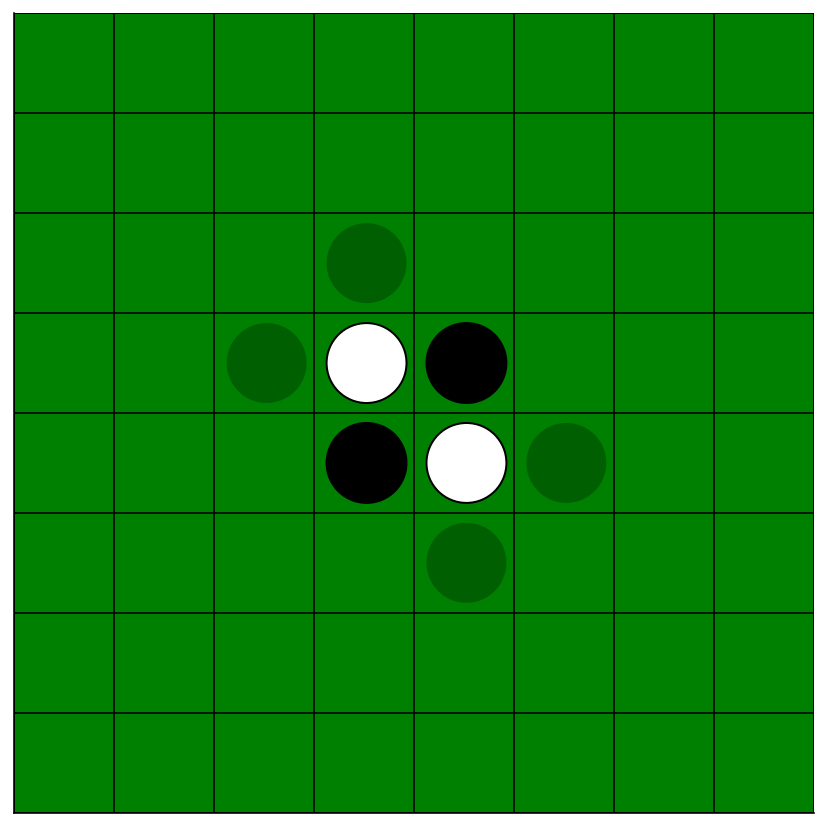

In [22]:
game = OthelloGame(n_games=2)
game.render()

`.get_available_actions()` now returns a list with one entry for each game.

In [23]:
actions = game.get_available_actions()
print("Available actions: ", actions)
print("Current player: ", game.current_player)

Available actions:  [[(2, 3), (3, 2), (4, 5), (5, 4)], [(2, 3), (3, 2), (4, 5), (5, 4)]]
Current player:  1


Note that there is still just one current player. This is because we play both games in parallel.

`.step()` will now take a *matrix* of actions, with one row per game. 

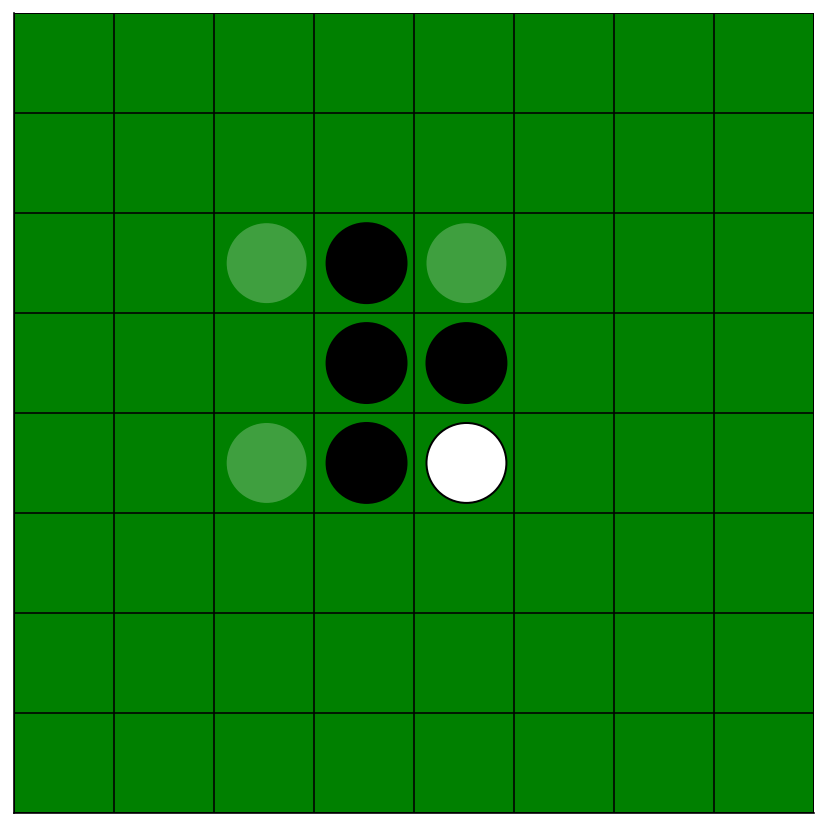

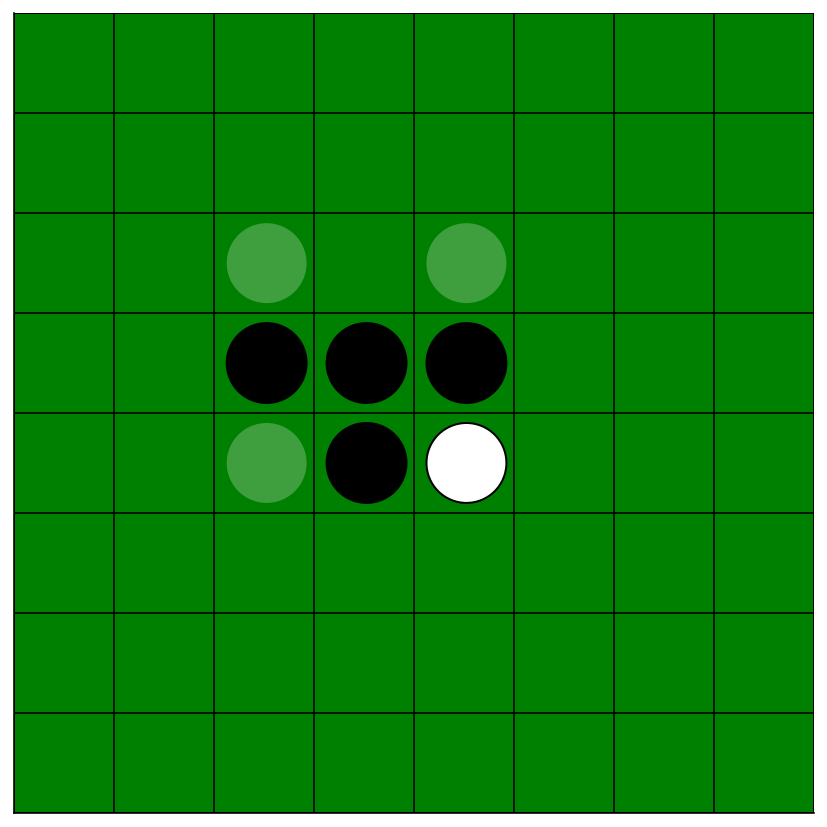

In [24]:
game = OthelloGame(n_games = 2)
actions = np.array([[2,3],    # game 1
                    [3,2]])   # game 2
game.step(actions)
game.render()

## Section 1.3: The super-basics of Pytorch Tensors


Video available at https://youtube.com/watch?v=U5Bdnt7aNvA


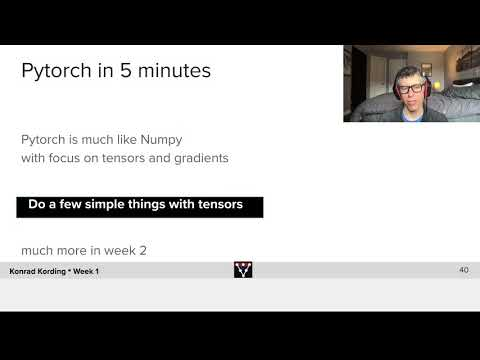

In [25]:
#@title Video: A Whirlwind Tour of Pytorch
video = YouTubeVideo(id="U5Bdnt7aNvA", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video


This class will use Pytorch. Next week will be our real introduction to Pytorch – so hold on! This will seem like a lot if you haven't learned this language before.

Today, all that is needed to know is that Pytorch acts a lot like Numpy. We can create Tensors (instead of arrays):

In [26]:
t = torch.Tensor([[3,2],[4,2]])
print(t)

tensor([[3., 2.],
        [4., 2.]])


Run torch commands on these tensors:

In [27]:
print(torch.sum(t, dim=1))
print(torch.argmax(t, dim=0))

tensor([5., 6.])
tensor([1, 0])


And do essentially anything we would do in Numpy:

In [28]:
torch.rand(2,1,1)

tensor([[[0.5484]],

        [[0.9714]]])

Many more details will come tomorrow. There will always be more to Torch than we can tell you ourselves. The documentation is your friend!

## Exercise 0: a Pytorch warm-up
As a test if your knowledge, let's see if you can use some Pytorch skills to learn something about the way we set up Othello boards.

Code something below to determine how many piece of a given player are on each board.


In [29]:
def count_pieces(game:OthelloGame, whoami):
    """A function to sum the number of pieces on the board of a given player
    current player (whoami).
    Inputs: game, an instance of OthelloGame
            whoami (int) 1 or 2, whose turn it is
    Outputs:
            populous_row: a 1d pytorch tensor of shape (n_games)"""

    #####################################################################
    # Fill in missing code (...),
    # then remove or comment the line below to test your function.
    ## hint 1: inspect game.boards
    ## hint 2: which dimension should you sum over to get row information?
    # IMPORTANT: Make sure to use PyTorch tensors and NOT numpy arrays!
    raise NotImplementedError("Complete the count_pieces function")
    #####################################################################

    n_my_pieces = ...

    return n_my_pieces

## Uncomment to test code
# game = OthelloGame(n_games=2) 
# for turn in range(4): # take some actions in both games
#     actions = actions_as_tensor(game.get_available_actions())
#     act = actions[[0,1],[0,2]]
#     game.step(act)

# game.render()
# print(count_pieces(game, 1))

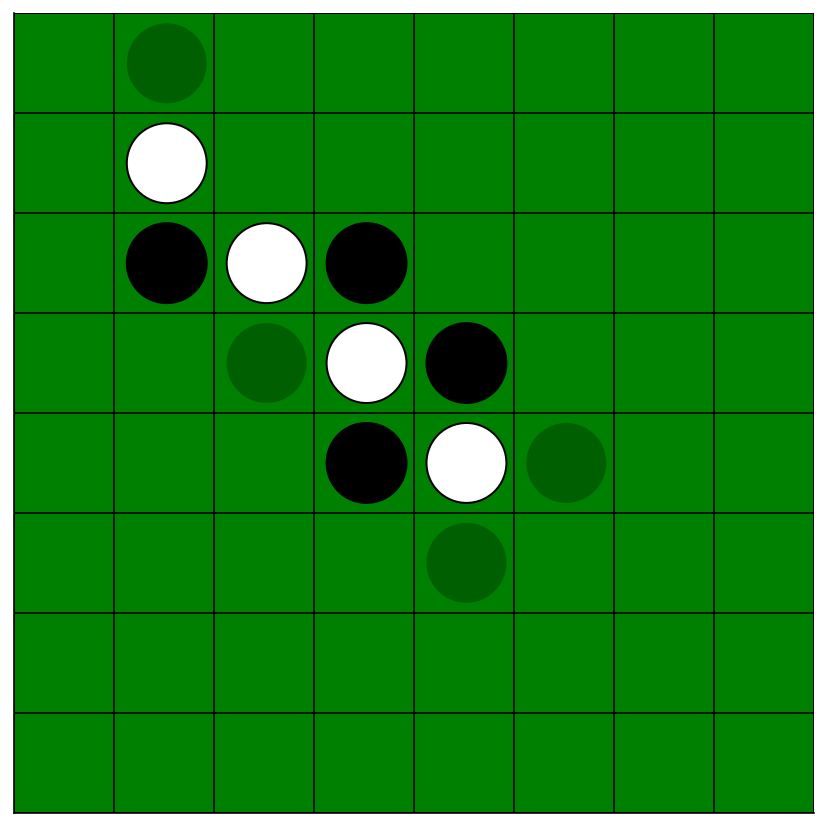

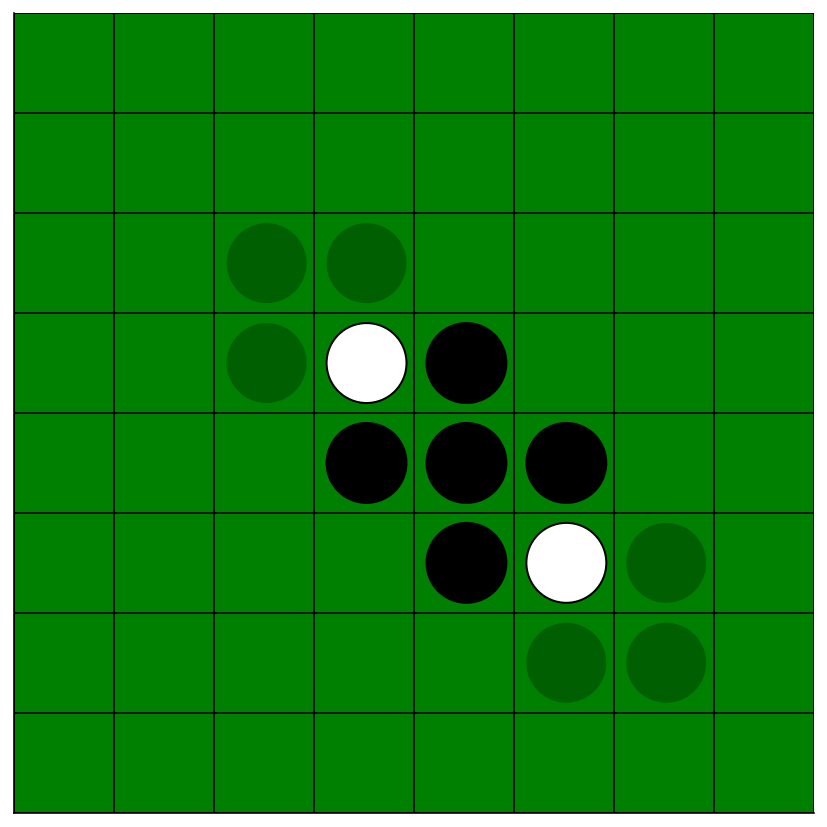

tensor([4, 5], device='cuda:0')


In [30]:
# to_remove solution
def count_pieces(game:OthelloGame, whoami):
    """A function to sum the number of pieces on the board of a given player
    current player (whoami).
    Inputs: game, an instance of OthelloGame
            whoami (int) 1 or 2, whose turn it is
    Outputs:
            populous_row: a 1d pytorch tensor of shape (n_games)"""

    n_my_pieces = torch.sum(game.boards==whoami, dim=(1,2))

    return n_my_pieces

## Uncomment to test code
game = OthelloGame(n_games=2) 
for turn in range(4): # take some actions in both games
    actions = actions_as_tensor(game.get_available_actions())
    act = actions[[0,1],[0,2]]
    game.step(act)

game.render()
print(count_pieces(game, 1))

---
# Section 2: Thinking harder about gameplaying

Video available at https://youtube.com/watch?v=oTLO7MY67Kc


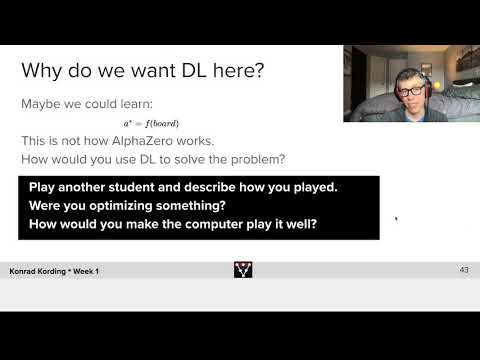

In [31]:
#@title Video: Gaining Intuition for how to use DL
video = YouTubeVideo(id="oTLO7MY67Kc", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

try:t2;
except NameError: t2=time.time()

video

In [32]:
#@title Create an interactive point-and-click interface (just run me)

def temporary_info(message, clear=False):
    """Output overwritable message to the console. If clear=True, overwrite all old messages
    """
    if clear:
        output.clear(output_tags="temporary-info")
    with output.use_tags("temporary-info"):
        print(message)

class InteractiveOthelloGame(object):
    def __init__(self, game=None, player1="human", player2="human", n=8):
        if game is None:
            self.game = OthelloGame(n_games=1, n=n)
        else:
            self.game = game
            assert game.n_games == 1, "Can't handle >1 games interactively!"
        self.players = [player1, player2]

    def next_turn(self):
        self.available_acts = self.game.get_available_actions()[0]
        if self.game.game_status == OthelloGame.ACTIVE:
            the_player = self.players[self.game.current_player-1]
            temporary_info(f"Begin Player {self.game.current_player}'s turn", clear=True)
            if the_player == "human":
                if len(self.available_acts) > 0:
                    temporary_info("Input move by clicking the board")
                else:
                    temporary_info("No legal moves! Click anywhere on the board to pass.")
                self.redraw()
                self._reregister_click_callback()
            else:
                temporary_info("Waiting for AI to complete...")
                ai_action = the_player.select_move(self.game)
                self.game.step(ai_action)
                self.next_turn()
        else:
            self.redraw()
            temporary_info("GAME OVER!", clear=True)
            values = self.game.score_games()
            if values[0] == 0:
                temporary_info(f"Game ended in a draw")
            else:
                winner_id = 1+np.argmax(values)
                try:
                    name = self.players[winner_id-1].name
                except AttributeError:
                    name = f"Player {winner_id}"
                temporary_info(f"{name} is the winner!")

    def handle_user_click(self, x_pix, y_pix, plot_width, plot_height):
        if len(self.available_acts) == 0:
            # If there is not available action all you can do is pass
            self.game.step(OthelloGame.PASS)
            self.next_turn()
        else:
            cell_width = plot_width / self.game.boards.shape[2]
            cell_height = plot_height / self.game.boards.shape[1]
            cell_x, cell_y = int(x_pix / cell_width), int(y_pix / cell_height)
            action = (cell_y, cell_x)
            if action in self.available_acts:
                self.game.step(action)
                self.next_turn()
            else:
                temporary_info(f"Available actions are {self.available_acts} but you clicked {action}")

    def _reregister_click_callback(self):
        # Inject javascript which will detect a click and invoke a function called 'pass_to_python_handler'
        display(IPython.display.Javascript("""
        var plot_element = document.querySelector(".output_image").firstElementChild;
        plot_element.onclick = function(event){
            google.colab.kernel.invokeFunction("pass_to_python_handler", [event.offsetX, event.offsetY, plot_element.width, plot_element.height], {});
        };
        """))

        # Tell colab that when 'pass_to_python_handler' is called in JS, it should
        # call self.handle_user_click in python
        output.register_callback("pass_to_python_handler", self.handle_user_click)

    def redraw(self):
        # Clear previous output
        output.clear(output_tags='othello-interactive')
        # Draw a fresh plot and store the figsize in pixels
        with output.use_tags('othello-interactive'):
            self.game.render()

## Exercise 1: Play a game
In breakout rooms, play a quick game against another student.

Begin Player 1's turn
Input move by clicking the board


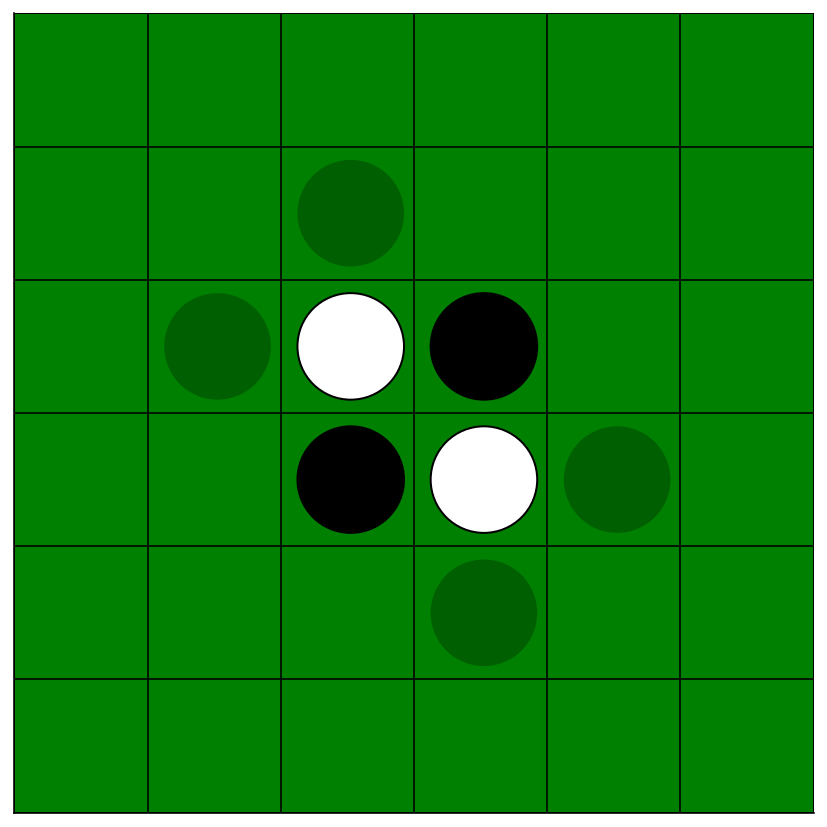

<IPython.core.display.Javascript object>

In [33]:
interface = InteractiveOthelloGame(n=6)
interface.next_turn()

Describe how you were thinking during the game. Were you optimizing something? Did you do some kind of planning?

In [34]:
play_analysis= 'something' #@param {type:"string"}

Run the above cell when you finish writing.

---
# Section 3: Planning and value judgement: two complementary strategies for game playing


Video available at https://youtube.com/watch?v=f6u-lq6tC-k


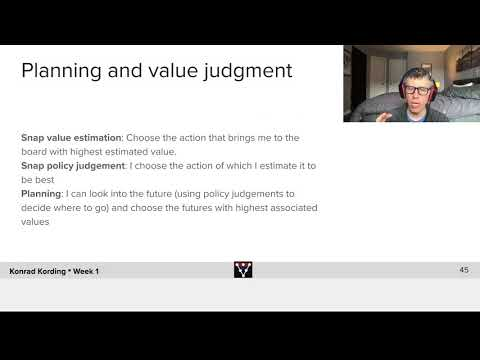

In [35]:
#@title Video: What Pieces Are Needed for Teaching a Computer Othello

param_list = ['play_analysis']
for param in param_list:
    if param not in locals():
        raise NameError("Please make sure to run the cell "
                        "after submitting your answer for <{}>!".format(param))

video = YouTubeVideo(id="f6u-lq6tC-k", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

try: t3;
except NameError: t3=time.time()

video


The magic of deep learning requires intelligently formulating your objective function. Gameplaying can be reduced to **two** separate objectives, each of which we will eventually train a neural network for. These objectives are **value** and **policy**. Very informally,

  - **Value** is a snap-judgement estimation of how likely a current game state will result in a final win (under some implicit game-playing strategy).
  - **Policy** is also a snap judgement that directly outputs the next promising move given a board state.

## Section 3.1: More about value




Let's think more about value. A value estimate is the probablility that a given board state $s$ will result in a win.

The value of a winning board state $V(s_W)$ is obviously 1. What about a loss? Typically $V(s_L)=0$, but today we're going to rescale $V(s)$ so that a loss has value $V(s_L)=-1$. Draws have $V(s_D)=0$.

It is crucial to understand that a value estimate board depends on an assumption of how moves are played by you and your opponents (your "policies"). A board state progresses to a terminal board state through these actions!

You may recall that value can be recursively calculated via Bellman's equation and knowledge of the policy. That's *not* how we're going to view it today. Instead, we'll imagine $V(s)$ to be calculated by neural intuition: a snap-judgement estimate of whether player 1 will win, lose, or draw.


## Exercise 2: Write your own value function

Warning to TAs: do not spend more than 20 minutes on this. If your timer hits 20 minutes, provide the solution.

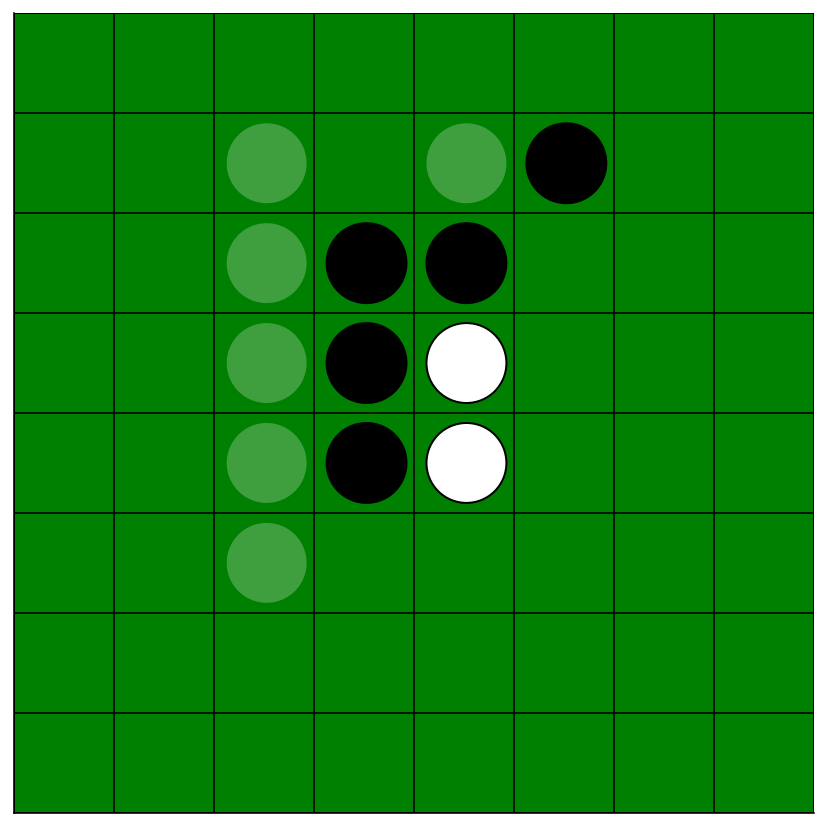

In [36]:
def my_board_value(board_states, whoami=1):
    """
    Returns the *value* of a board or set of boards.
    
    The value is a number between -1 and 1 that indicates how good that board is
    for the player. Specifically, the value is a measure of confidence
    that a board state will lead to a final win.
    1 is an estimated win, -1 a loss, and 0 means a draw.

    Inputs: board_states (torch tensor with size [n_games, n, n]):
                0s are positions with no piece:
                1 is player 1, 
                2 is player 2.
            whoami is an integer (1 or 2) indicating which player "you" are.
    Return +1 if the "whoami" player is sure to win, -1 if the "other" player is
    sure to win, 0 for a draw, or any value in between.

    Outputs: torch array (1d tensor) of values, one per n_games 

    Note: this function must not modify board_states!
    """
    n_games, n, _ = board_states.size()
    #####################################################################
    # Fill in missing code (...),
    # then remove or comment the line below to test your function.
    # Your heuristic doesn't need to be perfect. Just try to capture something
    # about "goodness" or "badness" of a board.
    # Remember that board_states is 3d (n_games, x, y) 
    # and we want a value for each game.
    # You may need to code multiple lines and use auxiliary variables
    # IMPORTANT: Make sure to use PyTorch tensors and NOT numpy arrays!
    raise NotImplementedError("Complete the my_board_value function")
    #####################################################################
    values = ... 

    assert type(values) == torch.Tensor, "type(values) must be torch.Tensor" 
    return values if whoami == 1 else -values

game = OthelloGame()
game.step(game.get_available_actions()[0][0])
game.step(game.get_available_actions()[0][1])
game.step(game.get_available_actions()[0][0])
game.render()

## uncomment the lines below to test your function
#print(f"Value for player 1 (dark) is {my_board_value(game.boards, whoami=1)}")
#print(f"Value for player 2 (light) is {my_board_value(game.boards, whoami=2)}")

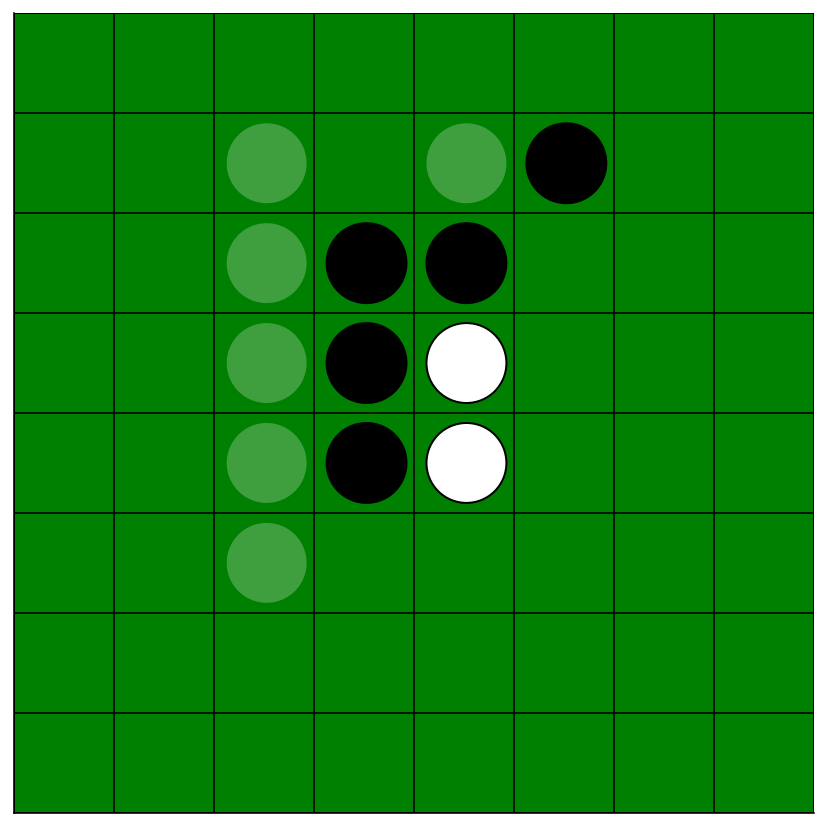

Value for player 1 (dark) is tensor([0.4286], device='cuda:0')
Value for player 2 (light) is tensor([-0.4286], device='cuda:0')


In [37]:
# to_remove solution
def my_board_value(board_states, whoami=1):
    """
    Returns the *value* of a board or set of boards.
    
    The value is a number between -1 and 1 that indicates how good that board is
    for the player. Specifically, the value is a measure of confidence
    that a board state will lead to a final win.
    1 is an estimated win, -1 a loss, and 0 means a draw.

    Inputs: board_states (torch tensor with size [n_games, n, n]):
                0s are positions with no piece:
                1 is player 1, 
                2 is player 2.
            whoami is an integer (1 or 2) indicating which player "you" are.
    Return +1 if the "whoami" player is sure to win, -1 if the "other" player is
    sure to win, 0 for a draw, or any value in between.

    Outputs: torch array (1d tensor) of values, one per n_games 

    Note: this function must not modify board_states!
    """
    n_games, n, _ = board_states.size()
    
    values = torch.zeros(n_games)
    n1 = (board_states == OthelloGame.PLAYER1).view(n_games, -1).sum(dim=1)
    n2 = (board_states == OthelloGame.PLAYER2).view(n_games, -1).sum(dim=1)

    frac1 = n1/(n1+n2)
    values = frac1*2-1

    return values if whoami == 1 else -values

game = OthelloGame()
game.step(game.get_available_actions()[0][0])
game.step(game.get_available_actions()[0][1])
game.step(game.get_available_actions()[0][0])
game.render()

## uncomment the lines below to test your function
print(f"Value for player 1 (dark) is {my_board_value(game.boards, whoami=1)}")
print(f"Value for player 2 (light) is {my_board_value(game.boards, whoami=2)}")

---
# Section 4: Training a neural network to approximate value

Video available at https://youtube.com/watch?v=4bOP7KRlPf4


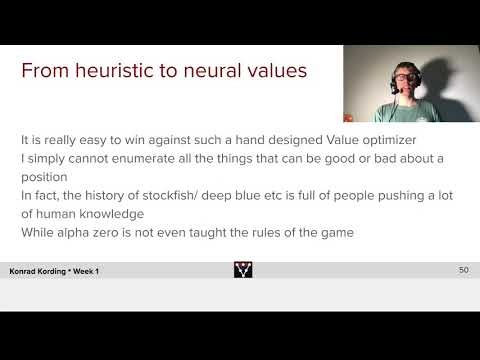

In [38]:
#@title Video: From Heuristics to Neural Values

video = YouTubeVideo(id="4bOP7KRlPf4", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

try: t4;
except NameError: t4=time.time()

video

Let's build a better value estimator using neural networks. 

We can only use a neural network if we can formulate an appropriate objective function to train towards, and if we can also build the proper labeled training set. How can we build the training set for a value net?

This is trickier than it may seem. A value function always implies the probability you will win *under your typical style of gameplay* and also *under your opponent's style of gameplay*. Value is not a property of the board state alone. 

## Exercise 3
Take 2 minutes in silence (before group discussion) and write down a strategy for training a neural network.

In [39]:
how_to_train_value= '' #@param {type:"string"}

Now read out your strategies in your pod.

---
## Section 4.1: Using value estimates to play games



Video available at https://youtube.com/watch?v=E7smDLlbjqs


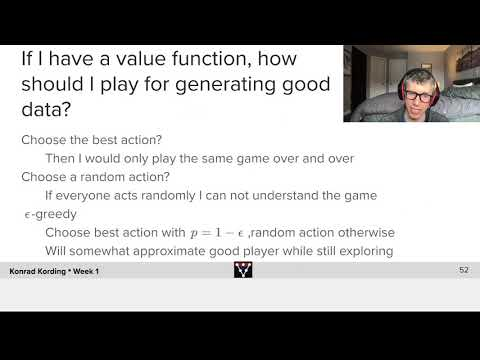

In [40]:
#@title Video: Epsilon Greedy Policy

param_list = ['how_to_train_value']
for param in param_list:
    if param not in locals():
        raise NameError("Please make sure to run the cell "
                        "after submitting your answer for <{}>!".format(param))

video = YouTubeVideo(id="E7smDLlbjqs", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

As your group probably observed, most (but not all!) strategies for training a value function involve observing games. We need to observe board states, observe the resulting play and outcome, and train a network to predict the outcome.

How can we build a gameplaying agent? Luckily, one can use a value function alone to play games. This means we can "pick ourselves up by our bootstraps" and use a value function to train a better value function.

One strategy to play with a value estimate alone is to play **"$\epsilon$-greedy"** w/r/t your value estimate.
$\epsilon$-greedy playing proceeds by:
 - choosing a random action with probability $\epsilon$
 - with probability $1-\epsilon$, choose the action that results in a board state with the highest estimated value.

### Implement an $\epsilon$ greedy agent
Here we will create a $\epsilon$-greedy AI that uses your hand-built value function. 

First, let us introduce the base class `ArtificialPlayer` that will be subclassed in all AI players below.

In [41]:
class ArtificialPlayer(object):
    """A base class for agents that play Othello. Sub-classes must provide a
    select_move method which takes in an OthelloGame and returns an action
    (in other words, returns a tuple (row,col) to place a stone or None to pass)
    """
    def __init__(self, name="AI Agent"):
        self.name = name

    def select_move(self, game:OthelloGame):
        raise NotImplementedError("Must subclass with a playing rule")

Now, we will create an `EpsilonGreedyAgent` that subclasses `ArtificialPlayer`. By default, this has an `evaluate` function that is simply your `my_board_value` from above. 

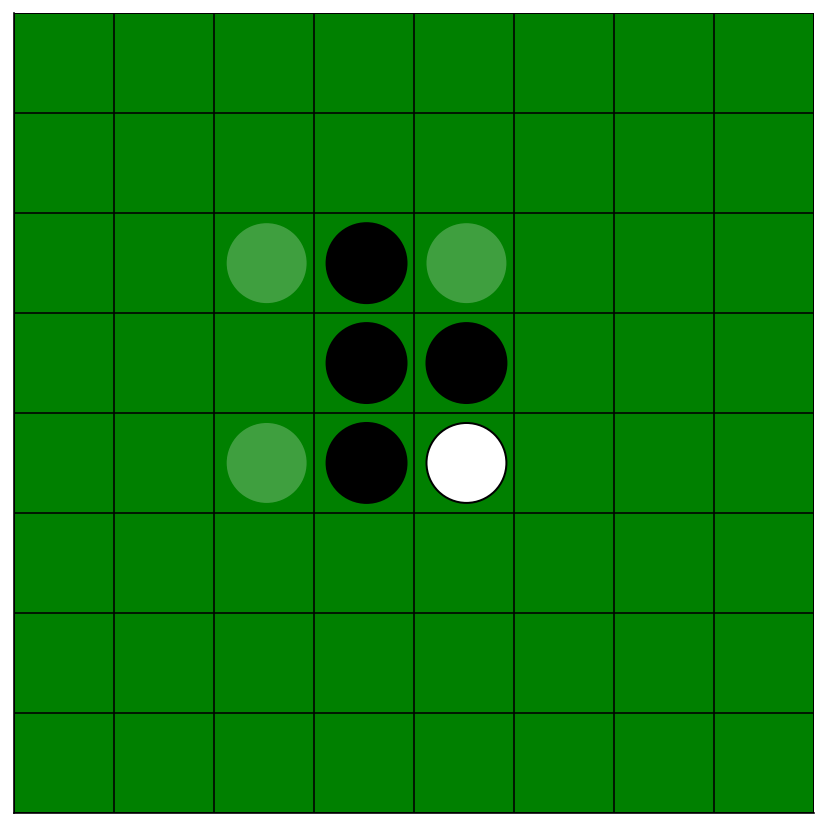

In [42]:
class EpsilonGreedyAgent(ArtificialPlayer):
    def __init__(self, epsilon=0.05, name=None):
        super(EpsilonGreedyAgent,
              self).__init__(name if name is not None else f"Epsilon={epsilon}")
        self.epsilon = epsilon

    def select_move(self, game:OthelloGame):
        # Evaluate all actions in all games.
        all_values, actions_tensor, actions_list = self.batch_evaluate(game,
                                                        game.current_player)
        # Initially select the best action in each game.
        chosen_action = torch.zeros(game.n_games, 2, dtype=torch.int32)
        for g in range(game.n_games):
            # If there are no moves available, pass
            if len(actions_list[g]) == 0:
                chosen_action[g, :] = -1
                continue
            if np.random.rand() < self.epsilon:
                acts = actions_list[g]
                random_choice = acts[np.random.randint(len(acts))]
                chosen_action[g, :] = torch.as_tensor(random_choice,
                                                      dtype=torch.int32)
            else:
                idx = torch.argmax(all_values[g])
                chosen_action[g, :] = actions_tensor[g, idx, :]

        return chosen_action

    def evaluate(self, game:OthelloGame, whoami:int):
        """
        Evaluation function used in "select_move" below.
        Subclasses may override evaluate() to create epsilon-greedy players
        with a different value function.
        """
        # Default to the hand-coded heuristic from above
        return my_board_value(game.boards, whoami)
    
    def batch_evaluate(self, game:OthelloGame, whoami:int):
        """Call evaluate() once per available action. Returns three things:
            - 'values' a [n_games, n_actions] tensor containing values estimated
              for each action per game.
            - 'actions_tensor' a [n_games, n_actions, 2] tensor containing the
              (row,col) coordinates of corresponding actions.
            - 'actions_list' the output of game.get_available_actions

        Handles the case of game.n_games>1 somewhat efficiently. If different
        games have different #s of actions, then n_actions is the maximum number
        of actions in any of the games. 'actions' is padded with -1 on games
        that have fewer actions (since -1 indicates "pass") and 'values' is set
        to -inf on all pass moves.
        """
        # actions_list is a list of lists of tuples. One list per game.
        actions_list = game.get_available_actions()
        num_actions_each_game = torch.as_tensor(
                                        [len(acts) for acts in actions_list])
        max_actions = num_actions_each_game.max()
        # Allocate values output
        values = float('-inf')*torch.ones(game.n_games, max_actions)
        # Create a tensor of [n_games, max_actions, 2] that contains
        # all available actions for all games, padded with -1s (pass move)
        # where games have fewer than max_actions possible actions.
        actions_tensor = -torch.ones(game.n_games, max_actions, 2,
                                     dtype=torch.int32)
        for g in range(game.n_games):
            if num_actions_each_game[g] == 0:
                continue
            actions_tensor[g, :num_actions_each_game[g], :] =\
                torch.as_tensor(actions_list[g], dtype=torch.int32)
        
        # Evaluate each action, simultaneously for all games
        for i in range(max_actions):
            state = game.copy_state()
            game.step(actions_tensor[:,i,:])
            values[:,i] = self.evaluate(game, whoami)
            values[num_actions_each_game < i+1] = float('-inf')
            game.paste_state(state)
        return values, actions_tensor, actions_list


game = OthelloGame()
agent = EpsilonGreedyAgent(epsilon=0.05)
act = agent.select_move(game)
game.step(act)
game.render()

Now **you** play a game against your $\epsilon$-greedy agent

Begin Player 1's turn
Input move by clicking the board


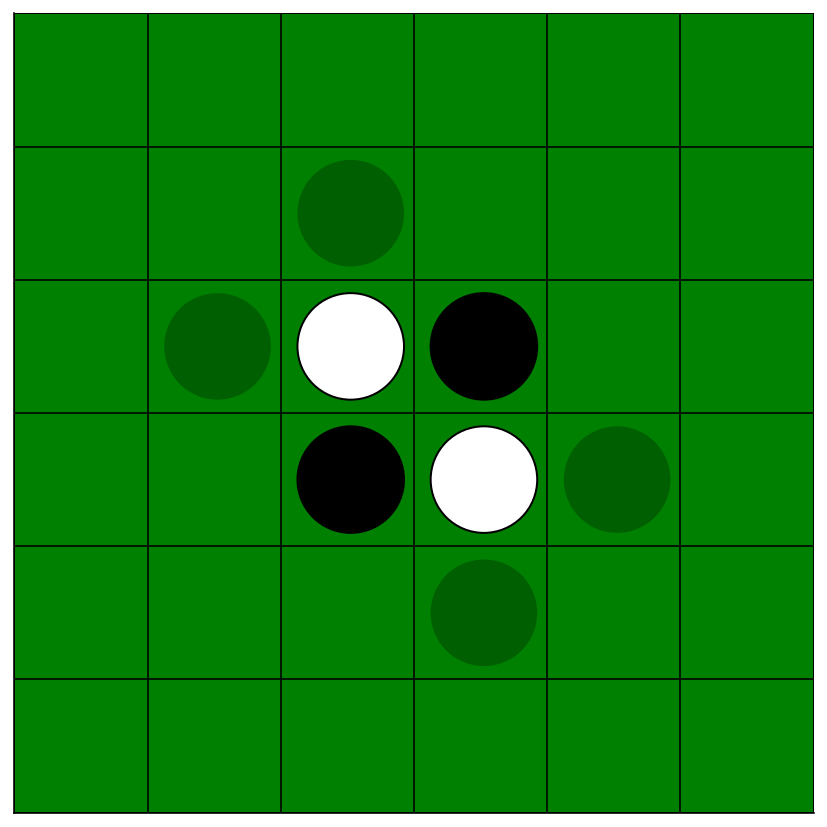

<IPython.core.display.Javascript object>

In [43]:
agent1 = "human"
agent2 = EpsilonGreedyAgent(0.1)
interface = InteractiveOthelloGame(n=6, player1=agent1, player2=agent2)
interface.next_turn()

Next we'll create a function to pit two AI agents against each other

In [44]:
#@markdown Define `ai_vs_ai`
def ai_vs_ai(agent1, agent2=None, n_games=1, randomize_players=True,
             print_result=False, progbar=True, n=8):
    """
    Pit 2 AI players against each other (or self-play if just 1 given). Return
    end-state values and list of board positions.
    """
    if agent2 is None:
        agent2 = agent1
    game = OthelloGame(n_games=n_games, n=n)
    saved_boards = [game.boards.clone()]
    agents = [agent1, agent2]
    if progbar:
        # Games rarely go beyond n^2-4 moves since passes are rare
        progress_bar = tqdm(total=game.n**2-4, desc='# moves per game')
    while torch.any(game.game_status == OthelloGame.ACTIVE):
        act = agents[game.current_player-1].select_move(game)
        game.step(act)
        saved_boards.append(game.boards.clone())
        # Flag all boards that are done by flooding them with nan
        saved_boards[-1][game.game_status==OthelloGame.OVER, ...] = float('nan')
        if progbar: progress_bar.update(1)
    if progbar:
        progress_bar.total = progress_bar.n
        progress_bar.close()
    values = game.score_games()
    if print_result:
        for g in n_games:
            print(f"Game {g+1} of {n_games}:", end="\t")
            if values[0] == 0:
                print("Draw")
            else:
                print(f"{agents[torch.argmax(values)].name}"
                "(Player {torch.argmax(values)+1}) is the winner!")
    # Return end-game value according to player 1 and 2, as well as a list of
    # all board states throughout play
    return values, saved_boards

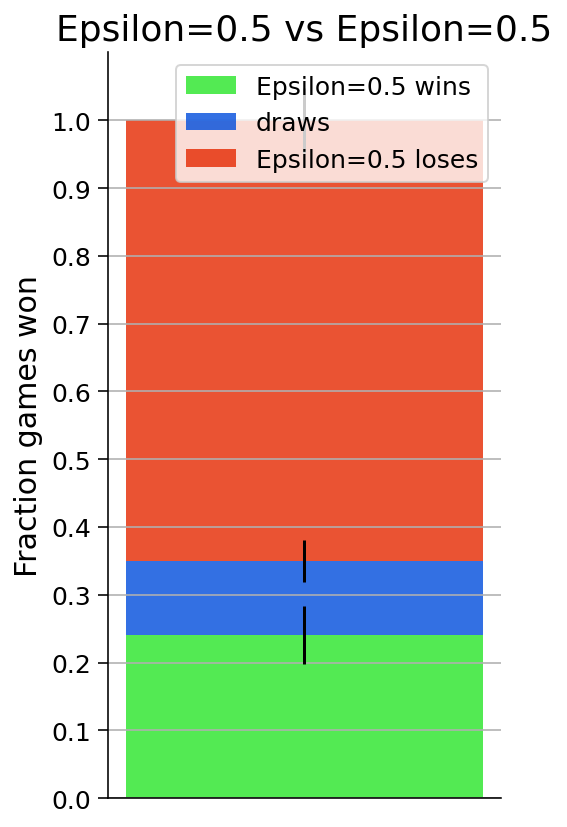

In [45]:
agent1 = EpsilonGreedyAgent(epsilon=0.5)
agent2 = EpsilonGreedyAgent(epsilon=0.5)
win_statistics(agent1, agent2, games_per_side=100);

---
## Section 4.2: Training an NN to estimate value via self-play


Video available at https://youtube.com/watch?v=MaW1WQ_O31w


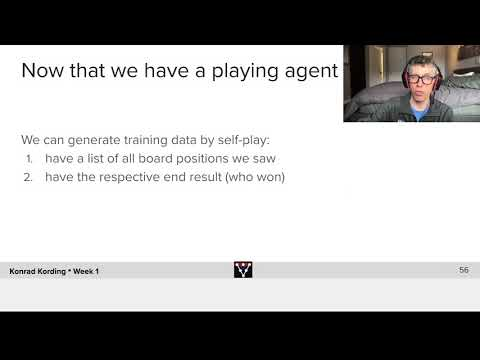

In [46]:
#@title Video: How To Implement a DL Agent to Play Othello

video = YouTubeVideo(id="MaW1WQ_O31w", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video


Here we define a little network. We'll learn much more about this soon!

In [47]:
# Set up a network for position evaluation. 
class ValueNet(nn.Module):
    def __init__(self, dropout=0.3, num_channels=64, n=8):
        super(ValueNet, self).__init__()

        # game params
        self.n=n
        self.num_channels = num_channels

        # two conv layers
        self.conv1 = nn.Conv2d(1,  num_channels, 3, stride=1)
        self.conv2 = nn.Conv2d(num_channels, num_channels, 3, stride=1)

        # two linear layers
        self.fc1 = nn.Linear(num_channels*(self.n-4)**2, num_channels*2)
        self.fc2 = nn.Linear(num_channels*2, 1)

    def forward(self, s):
        s = s.view(-1, 1, self.n, self.n)               
        s = F.relu(self.conv1(s))                     
        s = F.relu(self.conv2(s))                         
        s = s.view(-1, self.num_channels*(self.n-4)**2)

        s = F.relu(self.fc1(s))
        v = self.fc2(s)                                                                       

        return torch.tanh(v)

---
## Section 4.3: Train the network!

### Getting training data

Above, we defined the self-play function `ai_vs_ai`. Let's inspect its output.

In [48]:
agent1 = EpsilonGreedyAgent(epsilon=0.1)
raw_outcomes, raw_states = ai_vs_ai(agent)

In [49]:
print(raw_outcomes, raw_states[0])

tensor([[-1,  1]], device='cuda:0') tensor([[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 2., 1., 0., 0., 0.],
         [0., 0., 0., 1., 2., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]], device='cuda:0')


This pair of information will be the input and target for training our neural network below.

## Aside: preparing examples and data augmentation

Because of symmetries in the board, each example can be *augmented* into many examples. Once you've seen one board and outcome pair, you've actually seen many! This code augments the data for more efficient training.

If you want to learn more (and are way ahead of schedule), please check out the **Appendix** after the main tutorial.


---



Video available at https://youtube.com/watch?v=URVG1zyhaY0


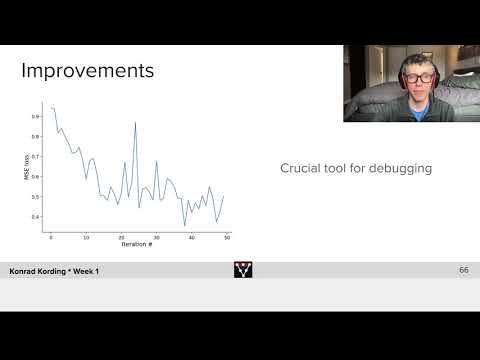

In [50]:
#@title Video: Training A Network by Optimizing Loss

video = YouTubeVideo(id="URVG1zyhaY0", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

The first thing we'll do is train a value network in a supervised learning setting. We'll observe games played out by some agents (your $\epsilon$-greedy agents), and try to predict the outcome. This prediction is the value estimate.

Below, we've defined a super standard train loop. We'll see loops like this over and over again this semester. It's important to walk through this code to get a sense of what happens.

In [51]:
#@markdown (RUN ME) Train helper functions `prepare_examples` and `boards2nn`
SYMMETRIES = [lambda x: x,
              lambda x: torch.rot90(x, 1, dims=(1, 2)),
              lambda x: torch.rot90(x, 2, dims=(1, 2)),
              lambda x: torch.rot90(x, 3, dims=(1, 2)),
              lambda x: torch.flip(x, dims=(1,)),
              lambda x: torch.flip(x, dims=(2,)),
              lambda x: torch.transpose(x, 1, 2),
              lambda x: torch.rot90(torch.flip(x,dims=(1,)), 1, dims=(1,2))]

def boards2nn(board_states) -> torch.Tensor:
    """
    Canonical preprocessing, taking in a set of boards and outputting NN inputs.
    """
    if isinstance(board_states, list):
        board_states = torch.cat(board_states, dim=0)
    else:
        board_states = board_states.clone() # Copy so not to affect the original
    # Convert from [0,1,2] to [0,1,-1] (player 2 represented with -1)
    board_states[torch.where(board_states == 2)] = -1
    return board_states

def prepare_examples(player1_value:torch.Tensor,
                     board_states:List[torch.Tensor]):
    """Take raw game observations (final value from P1 perspective, list of
    boards) and prepare a batch of training examples for the NN. Does 3 things
    to the input:
    1. Concatenates observations together
    2. Adds "inverse" of all the inputs to account for player 2's perspective
    3. Adds symmetries

    In total, this makes the effective # examples 16 times as big as the number 
    of input positions (8 symmetries from each of 2 players' perspectives)
    
    player1_value is size [n_games]
    board_states is size [max_num_moves].
    Each entry contains a [n_games,n,n] board state for each game at that move.
    """
    n_moves = len(board_states)
    n_games, n, _ = board_states[0].size()
    # Concatenate and preprocess board states.
    # Result is size [n_games*n_moves,n,n]
    # ordered like [game0turn0, game1turn0, ... gameNturn0,
    #               game0turn1, game1turn1, ... ]
    board_states = boards2nn(board_states)
    # Repeat all the player-1 values once per move. The input value are already
    # ordered like [game0, game1, ..., gameN] so to match the board order we
    # simply repeat() the values
    outcomes = player1_value.repeat(n_moves).float()
    # It may be the case that not all games ran for n_moves. These are indicated
    # by nan values in the board state (see ai_vs_ai)
    drop_states = torch.isnan(board_states[:,0,0])
    board_states = board_states[~drop_states]
    outcomes = outcomes[~drop_states]
    # Add all symmetries (increases effective data 8-fold)
    outcomes = outcomes.repeat(len(SYMMETRIES))
    board_states = torch.cat([sym(board_states) for sym in SYMMETRIES], dim=0)
    # Add in examples from player 2's perspective by flipping signs on both
    # value and on the board state itself
    outcomes = torch.cat([outcomes, -outcomes], dim=0)
    board_states = torch.cat([board_states, -board_states], dim=0)
    return outcomes, board_states

In [52]:
def train_value_by_self_play(value_net, agent, n_iters=50, games_per_iter=32,
                             n=8):
    """
    Play multiple batches of games where 'agent' plays against itself. The board
    positions and game outcomes will be used to train the neural net 'value_net'
    """
    # first we define the optimizer and initialize it with a learning rate. 
    # We're using Adam, but we could also have used stochastic gradient descent
    # via torch.optim.SGD
    opt = torch.optim.Adam(value_net.parameters(), lr=1e-3)
    # we'll minimize the MSE from the outcome to the network's output
    v_criterion = nn.MSELoss()

    # we'll loop over a number of network updates, each of which includes
    # a batch of self-play games
    losses = torch.zeros(n_iters).cuda()
    for i in tqdm(range(n_iters), desc='epochs'):
        ##### Here we build our training examples #####
        # batch some games and train based on player 1's perspective
        outcomes, board_states = [], []
        # Play AI against itself, running games_per_iter games all in parallel
        raw_outcomes, raw_states = ai_vs_ai(agent, n=n, n_games=games_per_iter,
                                            progbar=False)
        # Get all trainable information from this batch of games
        outcomes, board_states = prepare_examples(raw_outcomes[:,0], raw_states)

        ##### Here we train the network
        value_net.train() # Ensure we are in 'training' mode, not 'evaluation'
        opt.zero_grad() # ready the optimizer
        estimated_v = value_net(board_states).view(-1)  # predict
        loss = v_criterion(outcomes, estimated_v) # loss
        loss.backward() # get gradients of loss w/r/t the network parameters
        opt.step() # take a step to lower the loss

        losses[i] = loss.detach()

    return losses.cpu().numpy()

Create a new value network and train it on the output of the $\epsilon$-greedy player's games

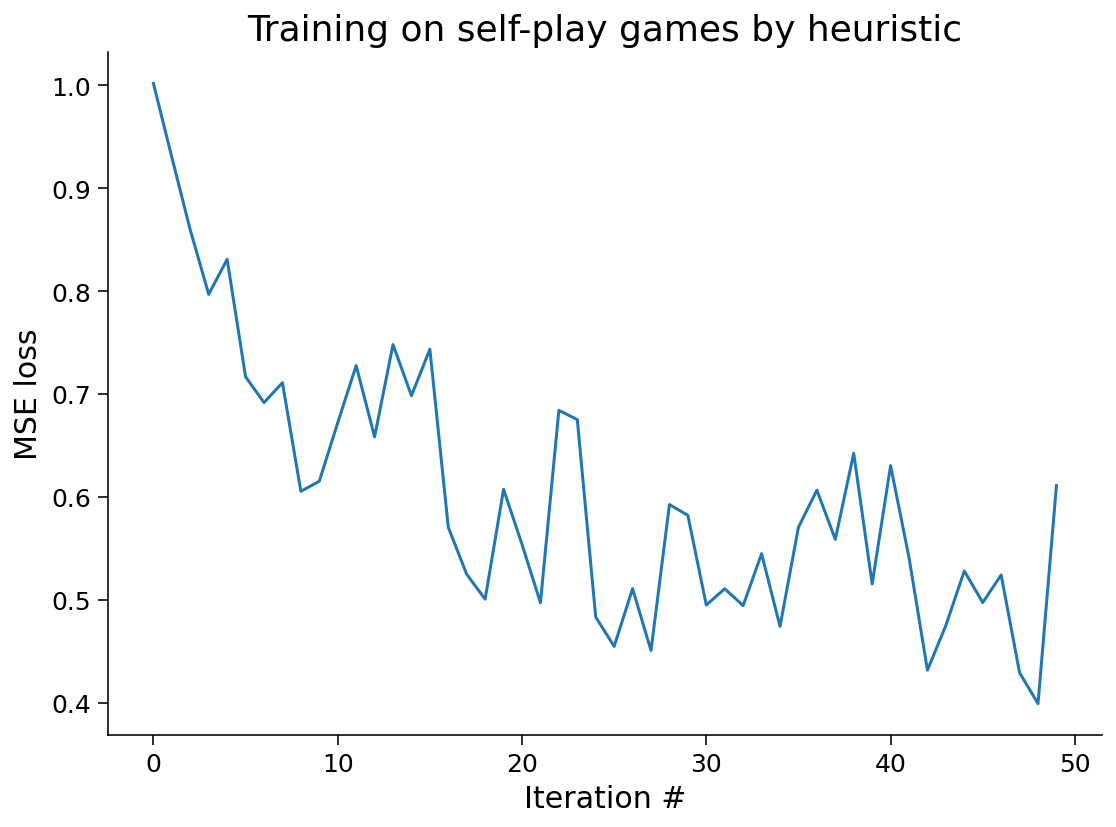

In [53]:
value_net = ValueNet(n=6).cuda()
heuristic_agent = EpsilonGreedyAgent(0.25, name="heuristic")
mse = train_value_by_self_play(value_net, heuristic_agent, n=6)

plt.figure()
plt.plot(mse)
plt.title(f"Training on self-play games by {heuristic_agent.name}")
plt.xlabel('Iteration #')
plt.ylabel('MSE loss')
plt.show()

**Student response:** Here we're minimizing the MSE between the outcome and the NN's estimate. Is that the best choice of loss criterion? Discuss with your group if this makes sense or if there's a better alternative.

In [54]:
better_criterion_or_no = '' #@param {type:"string"}

Let's make sure the value estimate makes sense. We've made a plotting routine that, for one batch of games, outputs the value estimate during the games. The lines are colored by the eventual true outcome.

In [55]:
def plot_value_predictions(value_net, agent, n_games=100, title=None):
    value_net.eval() # Ensure 'evaluation' rather than 'training' mode

    plt.figure(figsize=(8,4))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    outcomes, boards = ai_vs_ai(agent, n_games=n_games, progbar=True, n=6)
    board_nn = boards2nn(boards)
    # Note: some of boards_nn will be nan if the games ended early, in which
    # case we don't want to plot them anyway. Force those outputs to nan too.
    predicted_values_1 = value_net(board_nn)
    predicted_values_2 = value_net(-board_nn)
    predicted_values_1[torch.isnan(board_nn[:,0,0])] = float('nan')
    predicted_values_2[torch.isnan(board_nn[:,0,0])] = float('nan')
    for i in range(n_games):
        vals_1_this_game = predicted_values_1[i::n_games]
        vals_2_this_game = predicted_values_2[i::n_games]
        ax1.plot(vals_1_this_game.detach().cpu(),
                 color=outcome2color(outcomes[i,0].item(), 0.1))
        ax2.plot(vals_2_this_game.detach().cpu(),
                 color=outcome2color(outcomes[i,1].item(), 0.1))
    for i, ax in enumerate([ax1, ax2]):
        ax.set_xlabel('Turn #')
        ax.set_ylabel('Predicted Outcome')
        ax.grid()
        ax.set_title(f"Player {i+1}'s perspective")
    if title is not None:
        plt.suptitle(title, y=1.2, fontsize=14)
    plt.tight_layout()
    plt.show()

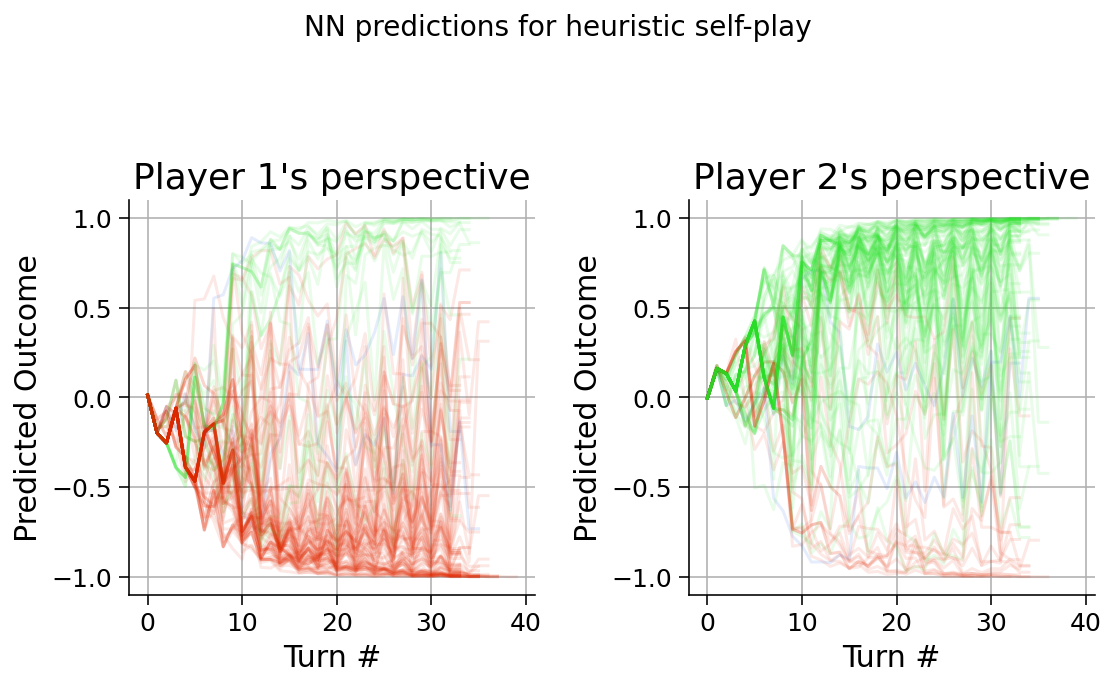

In [56]:
plot_value_predictions(value_net, heuristic_agent, 100, title=f"NN predictions for {heuristic_agent.name} self-play")

Discuss with your group as to whether this makes sense.

---
# Section 5: Making a neural $\epsilon$-greedy player

Now that we have a neural net that does a decent job of predicting game outcomes, we can use the neural network itself to evaluate the board and make greedy decisions! Let's try it.



Video available at https://youtube.com/watch?v=7s0aMrNFExo


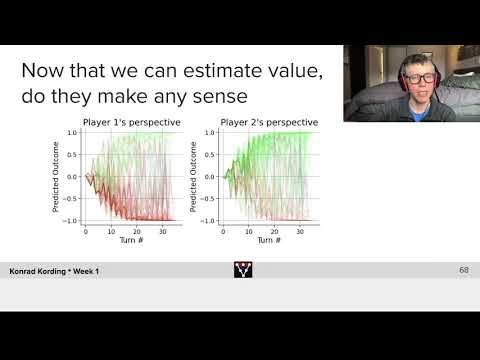

In [57]:
#@title Video: Making Sense of the Value Function

param_list = ['better_criterion_or_no']
for param in param_list:
    if param not in locals():
        raise NameError("Please make sure to run the cell "
                        "after submitting your answer for <{}>!".format(param))

video = YouTubeVideo(id="7s0aMrNFExo", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

try: t5;
except NameError: t5=time.time()

video

In [58]:
# Create a new epsilon-greedy agent whose value function comes from neural net
class NeuralGreedyAgent(EpsilonGreedyAgent):
    def __init__(self, value_net, epsilon=0.05, name=None):
        self.value_net = value_net
        name = name if name is not None else f"NeuralEpsilon{epsilon}"
        super(NeuralGreedyAgent, self).__init__(name=name, epsilon=epsilon)

    def evaluate(self, game:OthelloGame, whoami:int) -> float:
        """NeuralGreedyAgent.evaluate overrides EpsilonGreedyAgent.evaluate so
        that EpsilonGreedyAgent.select_move logic is unchanged.
        """
        # Ensure network is in 'evaluation' rather than 'training' mode
        self.value_net.eval()
        # Run the neural net on the board (player 1's perspective by default)
        v = self.value_net(boards2nn(game.boards)).flatten()
        # Grab the output as a float, but flip sign if "I" am player 2, since
        # the value net was always trained from the perspective of the player
        # whose pieces are "+1" on the board.
        return v if whoami == 1 else -v

Did we improve? Let's see who wins between the 'Neural' agent and the 'Heuristic' agent we hand-coded earlier. Remember: the neural net is simply trained to predict who wins __when the heuristic agent plays against itself!__

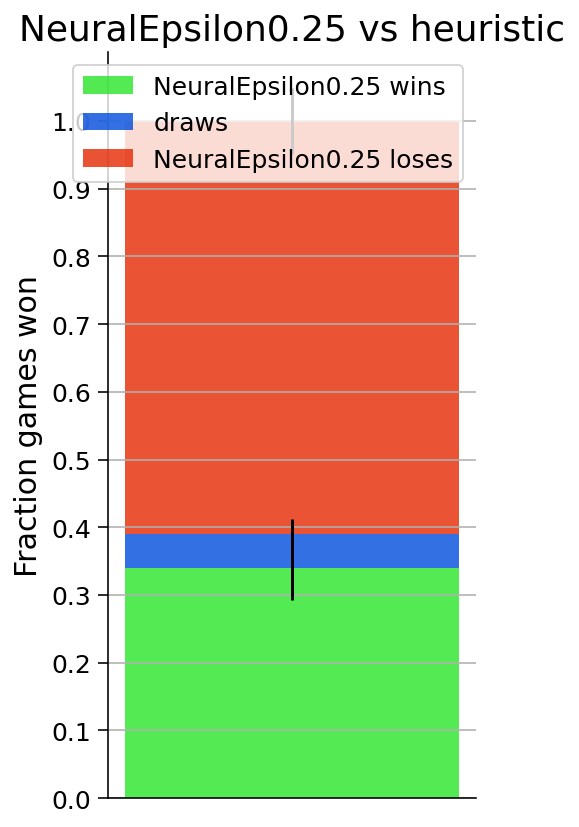

array([[34.,  5., 61.]])

In [59]:
neural_agent = NeuralGreedyAgent(value_net, epsilon=0.25)
win_statistics(neural_agent, heuristic_agent)

---
# Section 6: Lifting our value estimate up by its bootsraps

In [60]:
#@markdown I'm a time tracker, please run me.
try: t6;
except NameError: t6=time.time()

Perhaps we can do even better? Rather than predicting the outcome of the Heuristic agent's games, why don't we train the neural net to __predict the outcomes of its own games.__

To do this, the network will be alternating between two modes: in `evaluation` mode (`value_net.eval()`) it is just an input-output function, giving us its estimate of the value of board positions. After every batch of games, we switch into `training` mode (`value_net.train()`), replay all the games that just happened, and try to minimize prediction errors on them.

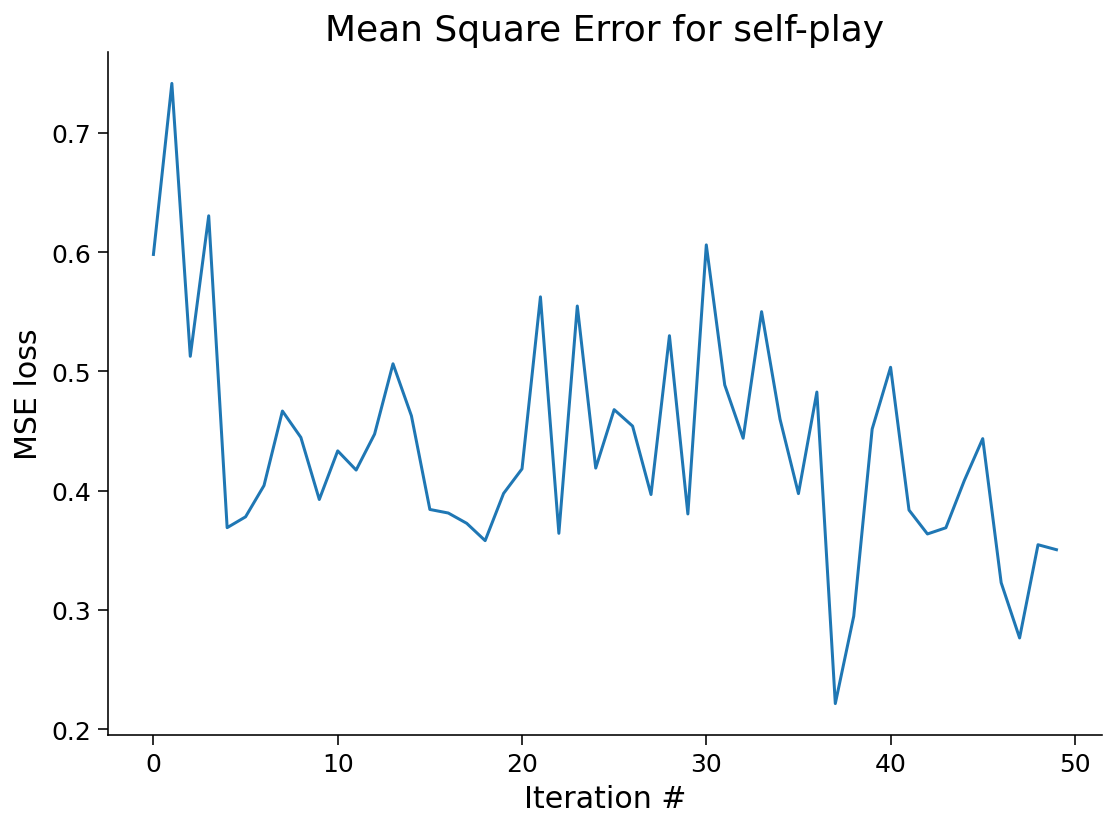

In [61]:
# Further train the value net through self-play
# (but make a copy of the net so we can compare before and after)
value_net_2 = deepcopy(value_net).cuda()
self_play_agent = NeuralGreedyAgent(value_net_2, epsilon=0.25)
# Train value_net_2 using games where the self_play_agent plays against itself
self_play_mse = train_value_by_self_play(value_net_2, self_play_agent, n=6)
plt.figure()
plt.title("Mean Square Error for self-play")
plt.plot(self_play_mse)
plt.xlabel('Iteration #')
plt.ylabel('MSE loss')
plt.show()

Why doesn't this appear to go down? Discuss with your group.

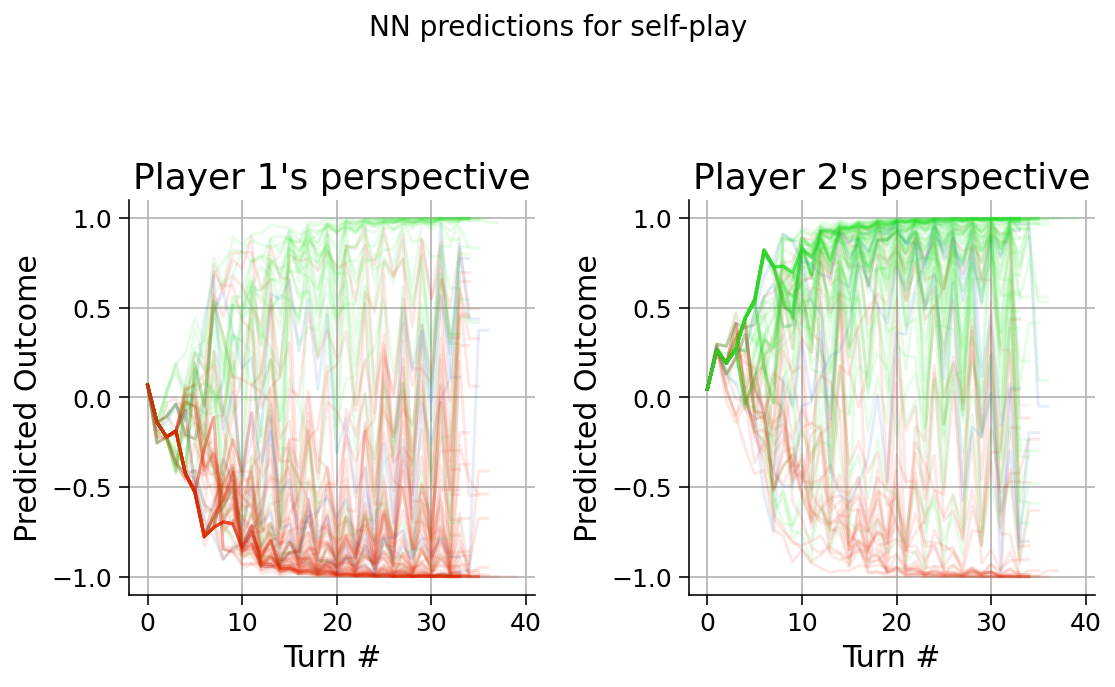

In [62]:
plot_value_predictions(value_net_2, self_play_agent, 100,
                       title="NN predictions for self-play")

We now have 3 agents: the original hand-coded "heuristic" agent, the "neural" agent that was trained to predict outcomes of the heuristic agent's games, and a "self-play" agent that further modified the "neural" agent's value net with games against itself.

Who wins?

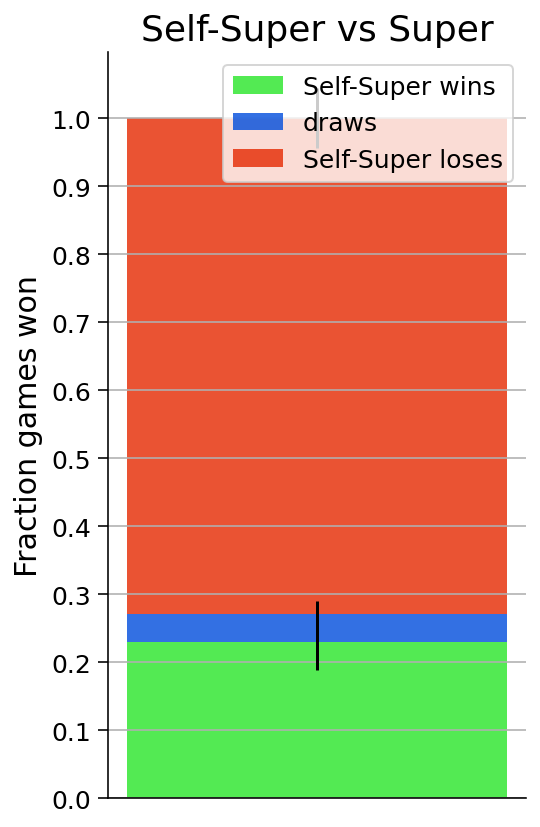

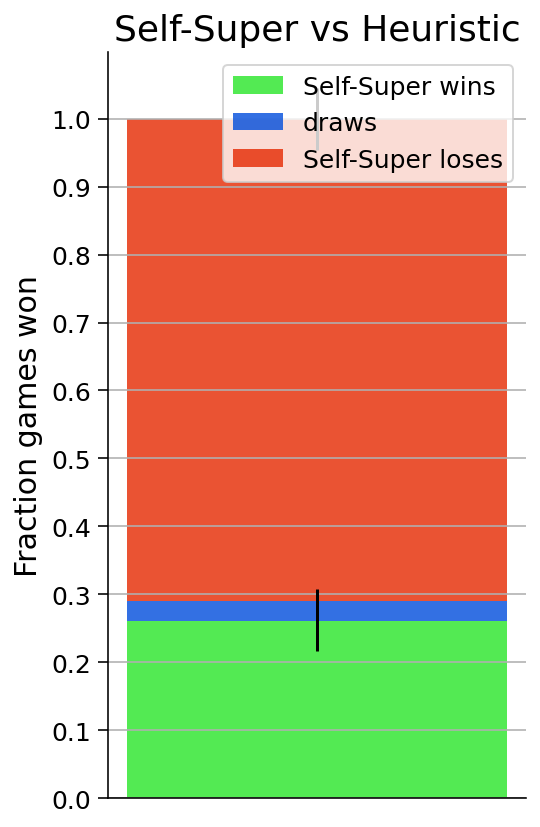

array([[26.,  3., 71.]])

In [63]:
neural_agent.name = 'Super'         # Short for "supervised training"
self_play_agent.name = 'Self-Super' # "self-play after supervised pretraining"
heuristic_agent.name = 'Heuristic'  # The hand-coded heuristic agent

win_statistics(self_play_agent, neural_agent)
win_statistics(self_play_agent, heuristic_agent)

### (If time) play a game against your best agent

Begin Player 1's turn
Input move by clicking the board


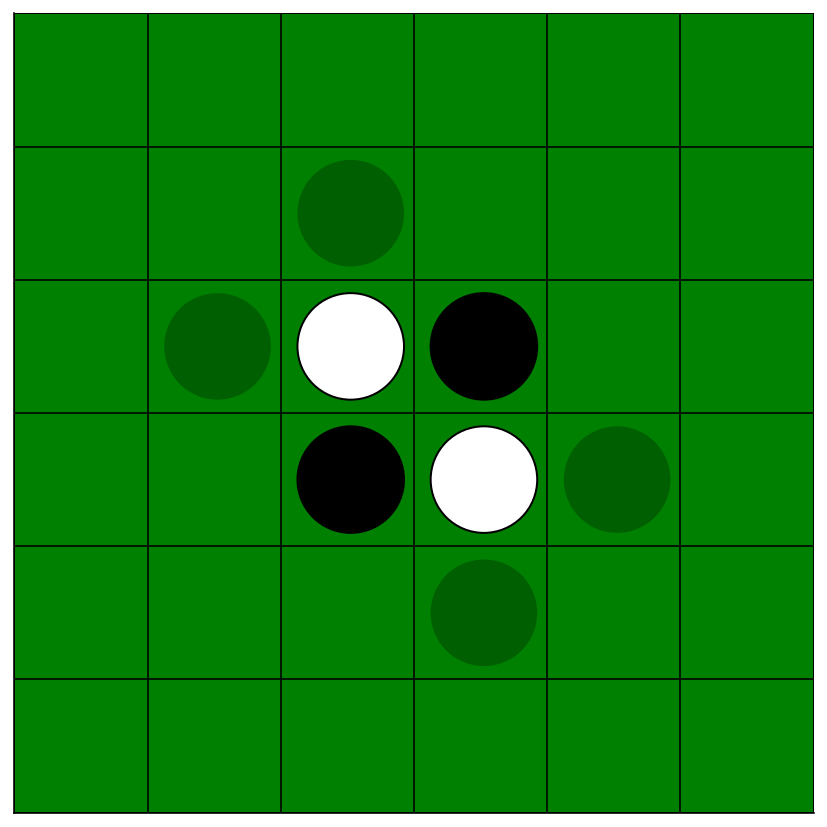

<IPython.core.display.Javascript object>

In [64]:
interface = InteractiveOthelloGame(player1='human',
                                   player2=self_play_agent, n=6)
interface.next_turn()

# Submit your responses
Please run the following cell and then press "Submit" so we can record your responses.

Video available at https://youtube.com/watch?v=m4k4Mo-wBj4


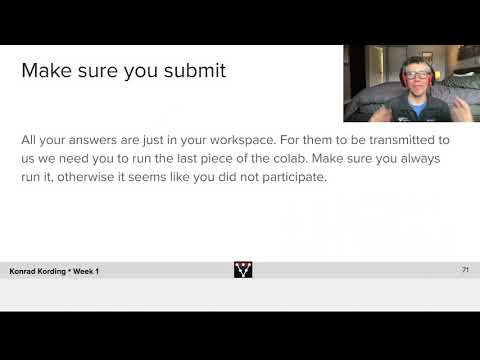

In [65]:
#@title Video: The End of Part 1

video = YouTubeVideo(id="m4k4Mo-wBj4", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)

try:t7;
except NameError: t7 = time.time()

video

In [66]:
import time
import numpy as np
from IPython.display import IFrame
#@markdown #Run Cell to Show Airtable Form
#@markdown ##**Confirm your answers and then click "Submit"**

def prefill_form(src, fields: dict):
  '''
  src: the original src url to embed the form
  fields: a dictionary of field:value pairs,
  e.g. {"pennkey": my_pennkey, "location": my_location}
  '''
  prefills = "&".join(["prefill_%s=%s"%(key, fields[key]) for key in fields])
  src = src + prefills
  src = "+".join(src.split(" "))
  return src


#autofill time if it is not present
try: t0;
except NameError: t0 = time.time()
try: t1;
except NameError: t1 = time.time()
try: t2;
except NameError: t2 = time.time()
try: t3;
except NameError: t3 = time.time()
try: t4;
except NameError: t4 = time.time()
try: t5;
except NameError: t5 = time.time()
try: t6;
except NameError: t6 = time.time()
try: t7;
except NameError: t7 = time.time()

#autofill fields if they are not present
#a missing pennkey and pod will result in an Airtable warning
#which is easily fixed user-side.
try: my_pennkey;
except NameError: my_pennkey = ""
try: my_pod;
except NameError: my_pod = "Select"
try: what_i_want;
except NameError: what_i_want = ""
try: theory_or_implementation;
except NameError: theory_or_implementation = 5
try: play_analysis;
except NameError: play_analysis = ""
try: network_role;
except NameError: network_role = ""
try: how_to_train_value;
except NameError: how_to_train_value = ""
try: epsilon_effect
except NameError: epsilon_effect = ""
try: better_criterion_or_no
except NameError: better_criterion_or_no = ""


times = np.array([t1,t2,t3,t4,t5,t6,t7])-t0

fields = {"pennkey": my_pennkey,
          "pod": my_pod,
          "expectation":what_i_want,
          "theory_imp": theory_or_implementation,
          "human_play_analysis":play_analysis,
          "network_role":network_role,
          "how_to_train_value":how_to_train_value,
          "epsilon_effect":epsilon_effect,
          "better_criterion_or_no":better_criterion_or_no,
          "cumulative_times": times}

src = "https://airtable.com/embed/shrUTMABKzfiDFEON?"

#now instead of the original source url, we do: src = prefill_form(src, fields)
display(IFrame(src = prefill_form(src, fields), width = 800, height = 400))

# Appendix


If you have extra time, come here to learn a little about symmetry in data and how to use that to train more efficiently. This material will also be revisted later in the course.

### Exercise
Briefly, before you continue, by what factor can we increase our training set size *without running any games?* 

In [67]:
free_data_augmentation_factor = 0 #@param {type:"number"}

Below, we've reproduced some functions from above that perform data augmentation from the results of `ai_vs_ai`. They also convert the data from numpy into pytorch.

Video available at https://youtube.com/watch?v=F9wx_GdXe4Q


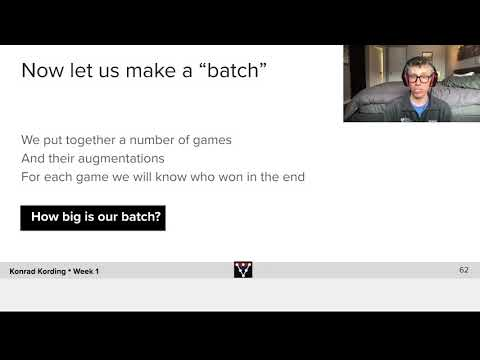

In [68]:
#@title Video: Data Augmentation and Batching

video = YouTubeVideo(id="F9wx_GdXe4Q", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

In [69]:
# can you make sense of this list of symmetries?
SYMMETRIES = [lambda x: x,
              lambda x: torch.rot90(x, 1, dims=(1, 2)),
              lambda x: torch.rot90(x, 2, dims=(1, 2)),
              lambda x: torch.rot90(x, 3, dims=(1, 2)),
              lambda x: torch.flip(x, dims=(1,)),
              lambda x: torch.flip(x, dims=(2,)),
              lambda x: torch.transpose(x, 1, 2),
              lambda x: torch.rot90(torch.flip(x,dims=(1,)), 1, dims=(1,2))]

def boards2nn(board_states) -> torch.Tensor:
    """
    Canonical preprocessing, taking in a set of boards and outputting NN inputs.
    """
    if isinstance(board_states, list):
        board_states = torch.cat(board_states, dim=0)
    else:
        board_states = board_states.clone() # Copy so not to affect the original
    # Convert from [0,1,2] to [0,1,-1] (player 2 represented with -1)
    board_states[torch.where(board_states == 2)] = -1
    return board_states

def prepare_examples(player1_value:torch.Tensor,
                     board_states:List[torch.Tensor]):
    """Take raw game observations (final value from P1 perspective, list of
    boards) and prepare a batch of training examples for the NN. Does 3 things
    to the input:
    1. Concatenates observations together
    2. Adds "inverse" of all the inputs to account for player 2's perspective
    3. Adds symmetries

    In total, this makes the effective # examples 16 times as big as the number 
    of input positions (8 symmetries from each of 2 players' perspectives)
    
    player1_value is size [n_games]
    board_states is size [max_num_moves].
    Each entry contains a [n_games,n,n] board state for each game at that move.
    """
    n_moves = len(board_states)
    n_games, n, _ = board_states[0].size()
    # Concatenate and preprocess board states.
    # Result is size [n_games*n_moves,n,n]
    # ordered like [game0turn0, game1turn0, ... gameNturn0,
    #               game0turn1, game1turn1, ... ]
    board_states = boards2nn(board_states)
    # Repeat all the player-1 values once per move. The input value are already
    # ordered like [game0, game1, ..., gameN] so to match the board order we
    # simply repeat() the values
    outcomes = player1_value.repeat(n_moves).float()
    # It may be the case that not all games ran for n_moves. These are indicated
    # by nan values in the board state (see ai_vs_ai)
    drop_states = torch.isnan(board_states[:,0,0])
    board_states = board_states[~drop_states]
    outcomes = outcomes[~drop_states]
    # Add all symmetries (increases effective data 8-fold)
    outcomes = outcomes.repeat(len(SYMMETRIES))
    board_states = torch.cat([sym(board_states) for sym in SYMMETRIES], dim=0)
    # Add in examples from player 2's perspective by flipping signs on both
    # value and on the board state itself
    outcomes = torch.cat([outcomes, -outcomes], dim=0)
    board_states = torch.cat([board_states, -board_states], dim=0)
    return outcomes, board_states

## Inspecting the `prepare_examples` code.

In [70]:
heuristic_agent = EpsilonGreedyAgent(0.25, name="heuristic")

outcomes, board_states = [], []
# Play AI against itself, running games_per_iter games all in parallel
raw_outcomes, raw_states = ai_vs_ai(agent, n_games=50)
# Get all trainable information from this batch of games
outcomes, board_states = prepare_examples(raw_outcomes[:,0], raw_states)

Inspect the size of `board_states` and `outcomes`:

In [71]:
print(outcomes.size(), board_states.size())

torch.Size([49344]) torch.Size([49344, 8, 8])


That's a big number! Where did that come from? 

**Student response:** Describe precisely why these objects have those sizes. What factors are multiplied to produce this number of boards, and what is their value?

In [72]:
why_this_size = '' #@param {type:"string"}